# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [565]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [566]:
cData = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [567]:
# let's check the shape of the data
cData.shape

(3454, 15)

In [568]:
# let's check the first 5 rows of the data
cData.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [569]:
# let's check column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [570]:
# let's check the statistical summary of the data
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [571]:
# let's check the statistical summary of the data
cData.describe(include='O')

,brand_name,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


In [572]:
cData["brand_name"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [573]:
cData["brand_name"].value_counts(normalize = 'True')

Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874
Vivo          0.033874
Honor         0.033584
HTC           0.031847
Nokia         0.030689
Motorola      0.030689
Sony          0.024899
Meizu         0.017950
Gionee        0.016213
Acer          0.014765
XOLO          0.014186
Panasonic     0.013607
Realme        0.011870
Apple         0.011291
Lava          0.010423
Celkon        0.009554
Spice         0.008686
Karbonn       0.008396
Coolpad       0.006369
BlackBerry    0.006369
Microsoft     0.006369
OnePlus       0.006369
Google        0.004343
Infinix       0.002895
Name: brand_name, dtype: float64

In [574]:
cData["os"].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [575]:
cData["os"].value_counts(normalize = 'True')

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

In [576]:
cData["4g"].unique()

array(['yes', 'no'], dtype=object)

In [577]:
cData["4g"].value_counts(normalize = 'True')

yes    0.676028
no     0.323972
Name: 4g, dtype: float64

In [578]:
cData["5g"].unique()

array(['no', 'yes'], dtype=object)

In [579]:
cData["5g"].value_counts(normalize = 'True')

no     0.955993
yes    0.044007
Name: 5g, dtype: float64

In [580]:
# Missing data
pd.DataFrame({'Count':cData.isnull().sum()[cData.isnull().sum()>0]})

,Count
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6
weight,7


#### Observations
* Among the named phone/tablet brands in the data set, the top one is Samsung with 9.8% followed by Huawei and LG
* Android os dominates the data set with a count of 93.05%
* 5g is available to 95.5% of the phone/tablets and 4g is available to to 67.6% 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [581]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [582]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

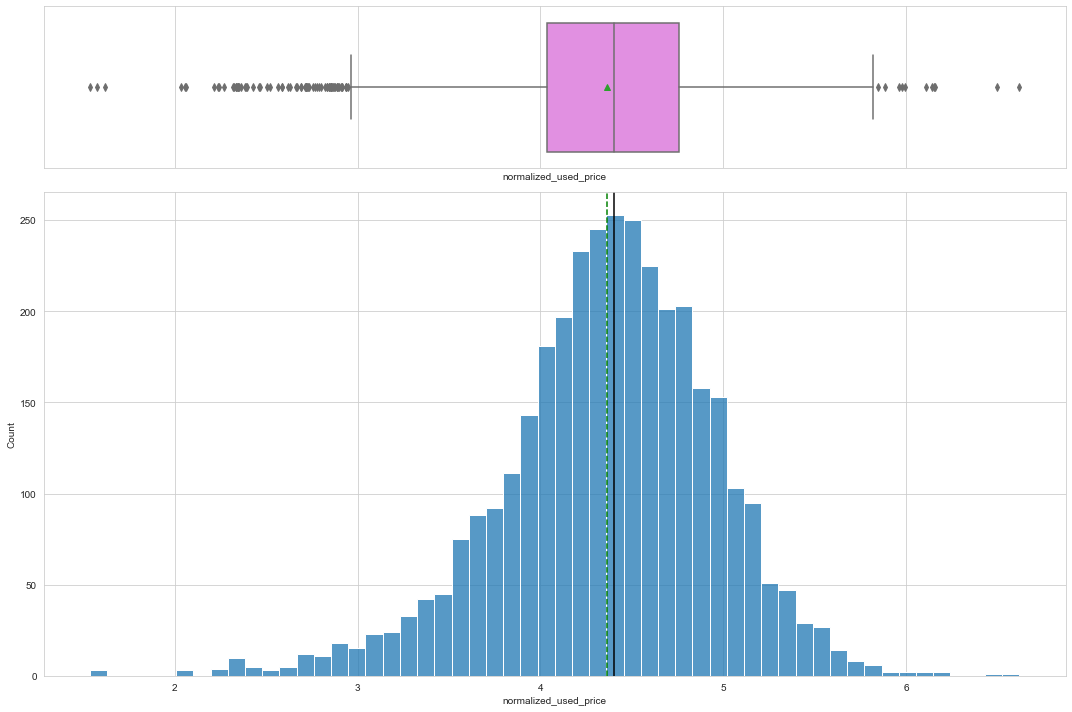

In [583]:
histogram_boxplot(cData, "normalized_used_price")

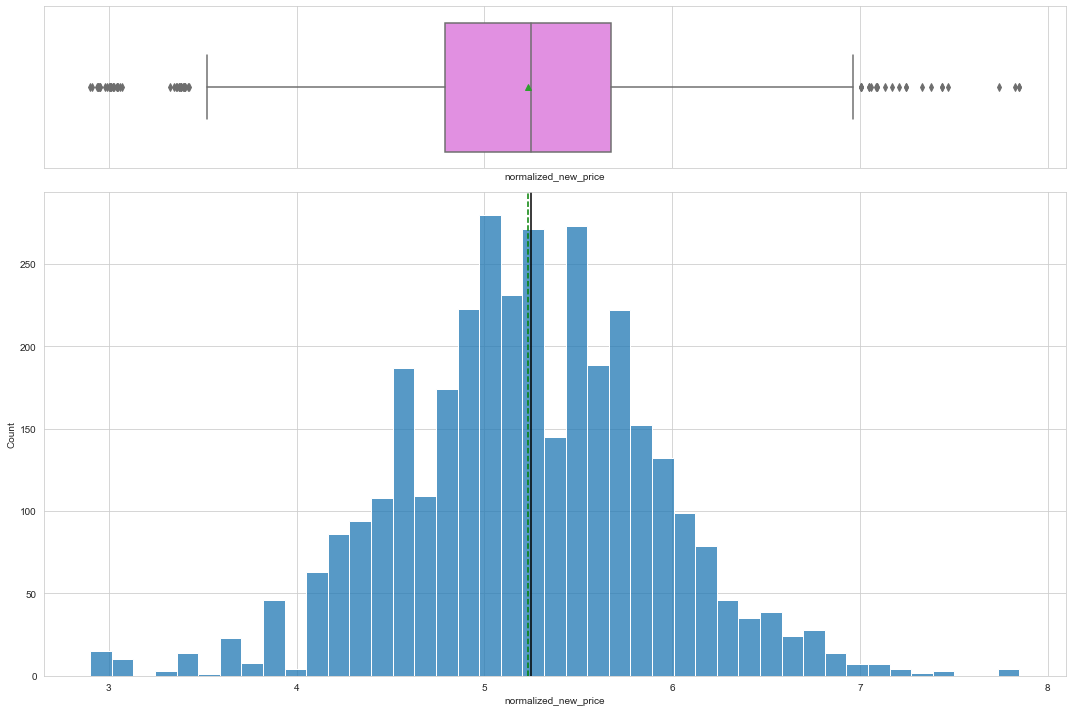

In [584]:
histogram_boxplot(cData, "normalized_new_price")

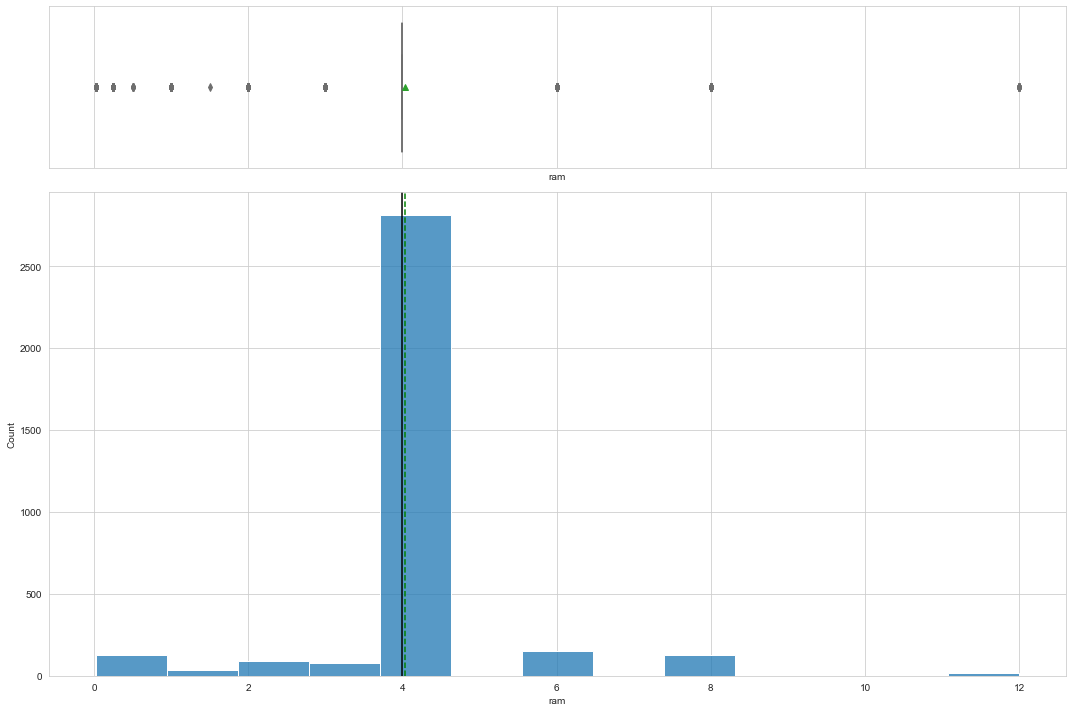

In [585]:
histogram_boxplot(cData, "ram")

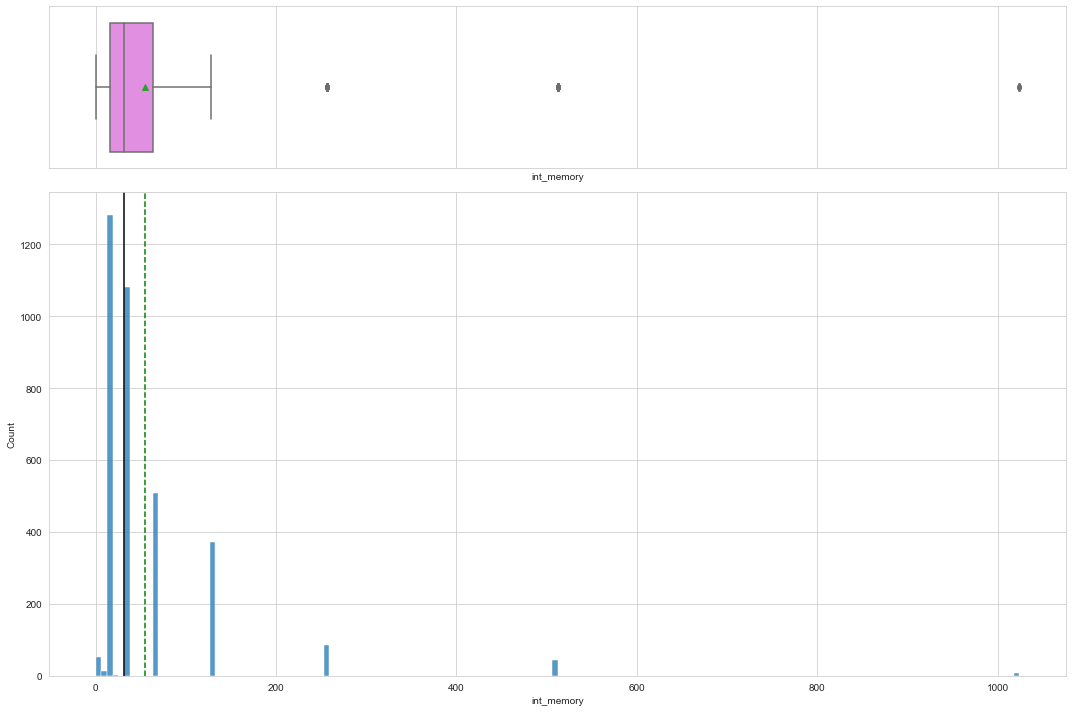

In [586]:
histogram_boxplot(cData, "int_memory")

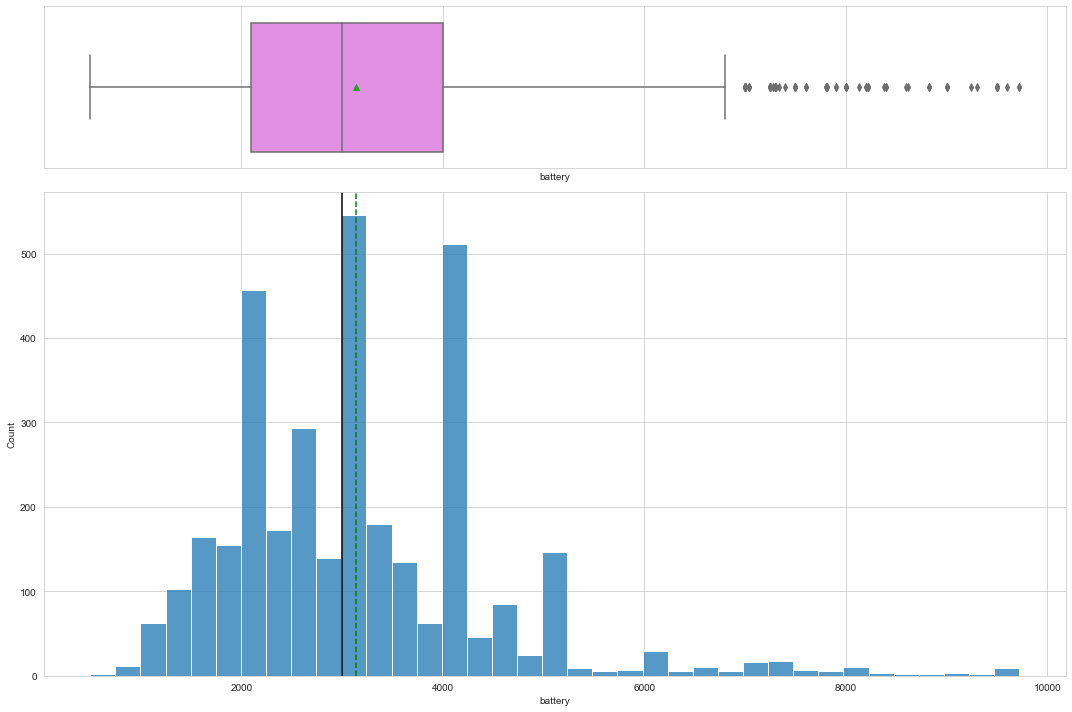

In [587]:
histogram_boxplot(cData, "battery")

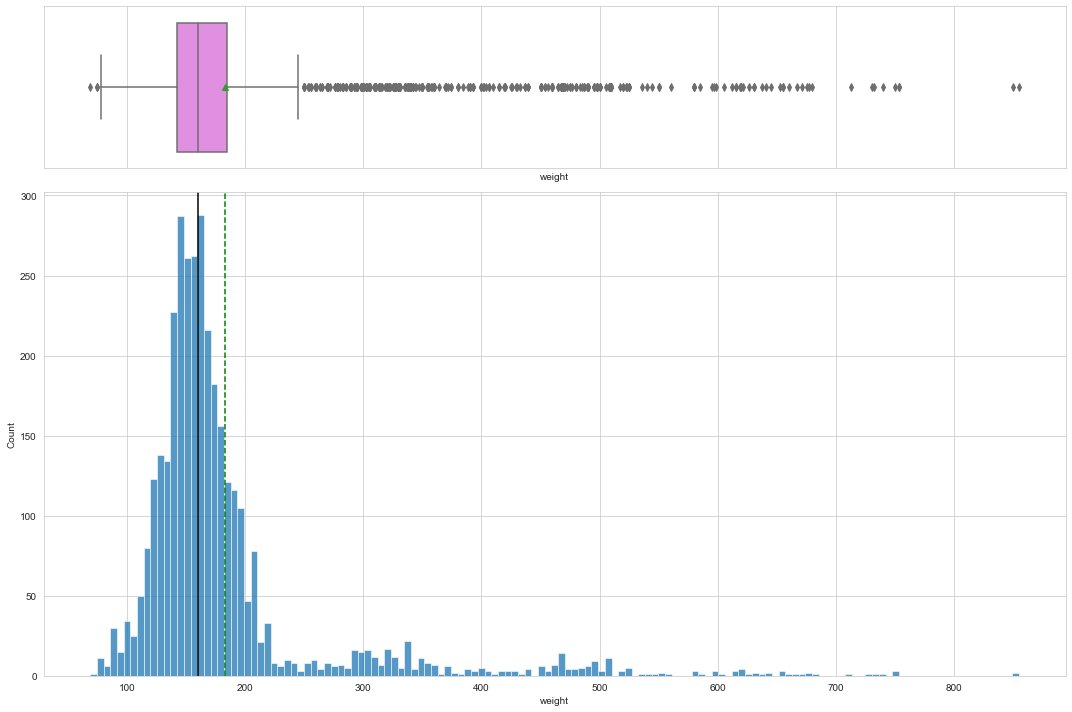

In [588]:
histogram_boxplot(cData, "weight")

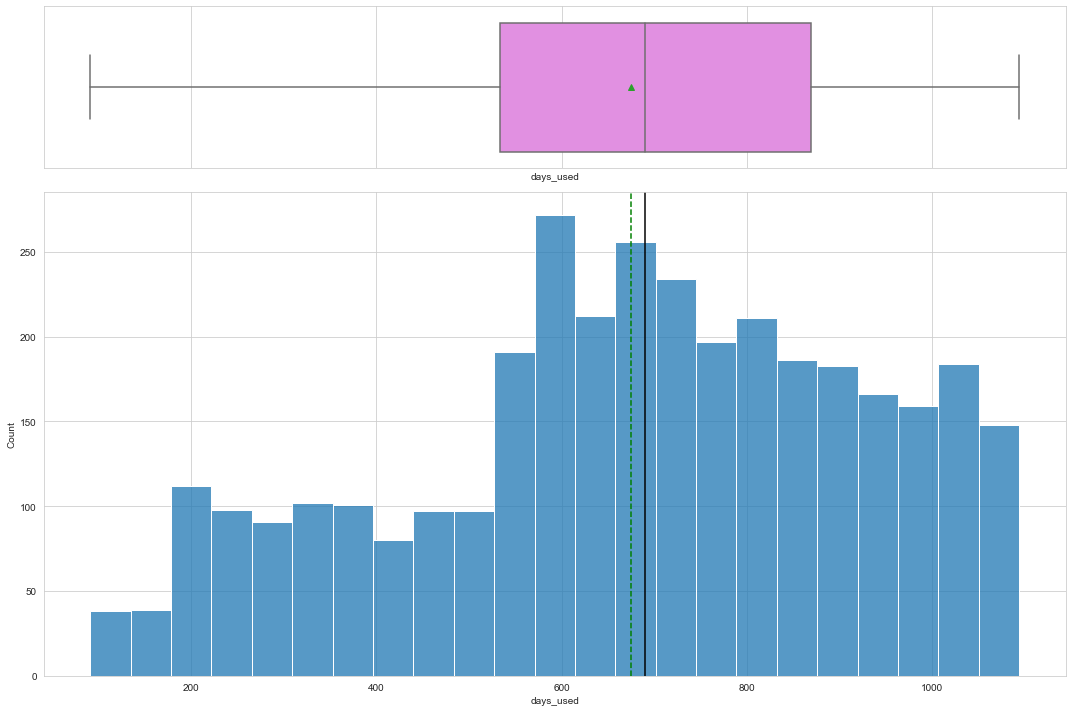

In [589]:
histogram_boxplot(cData, "days_used")

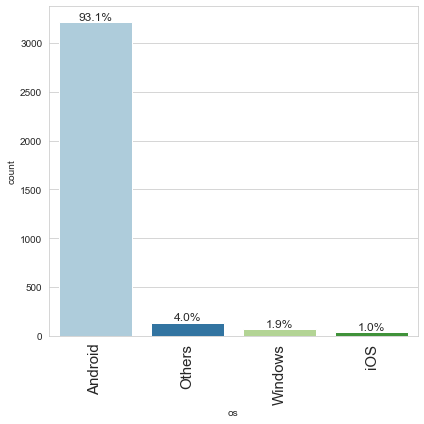

In [590]:
labeled_barplot(cData, "os", perc=True)

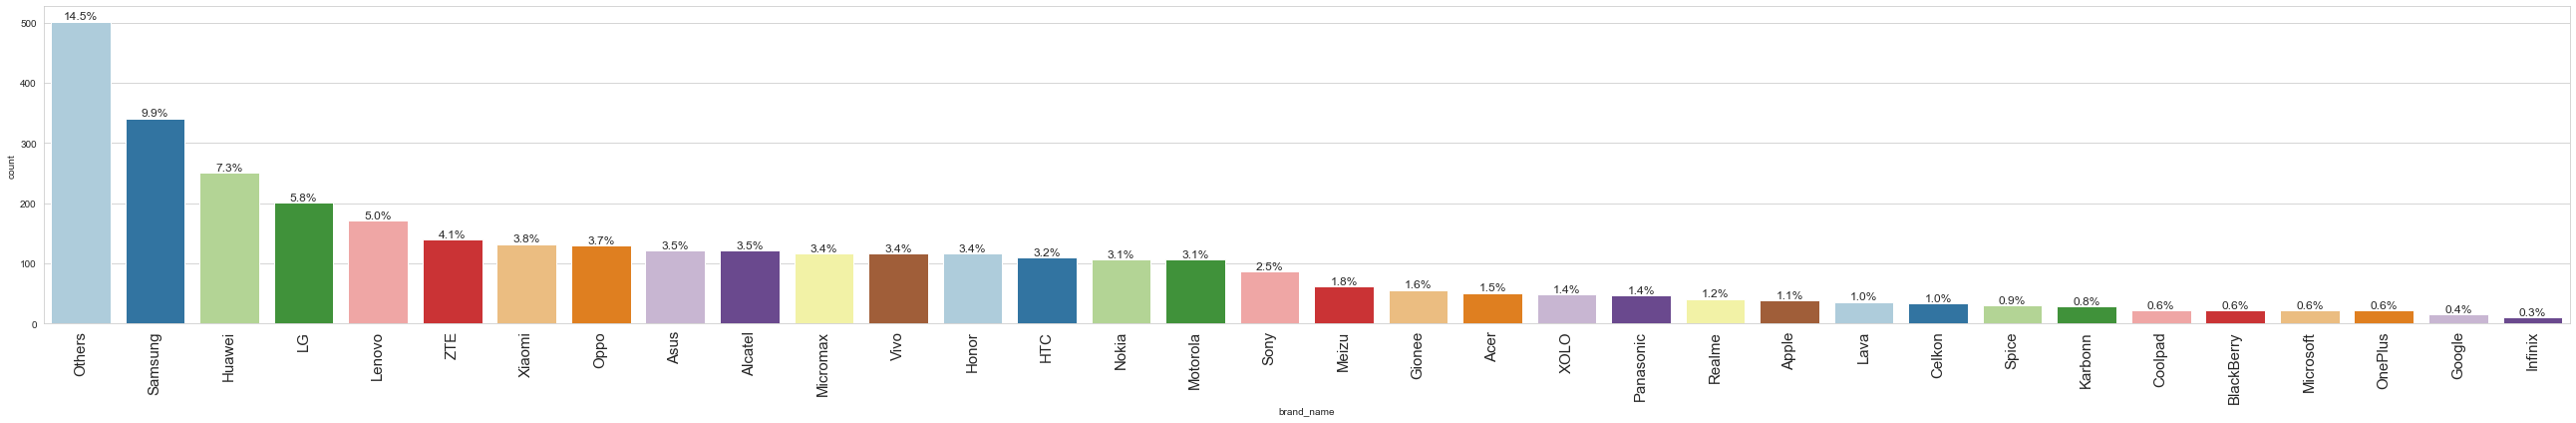

In [591]:
labeled_barplot(cData, "brand_name", perc=True)

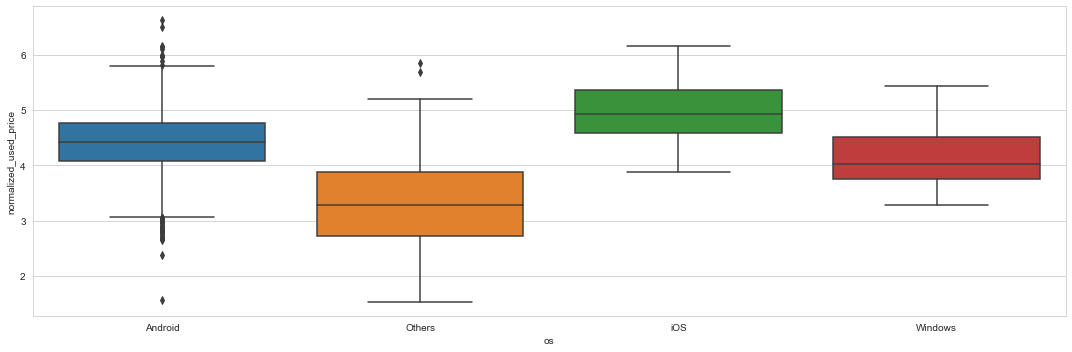

In [592]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="normalized_used_price")
plt.show()

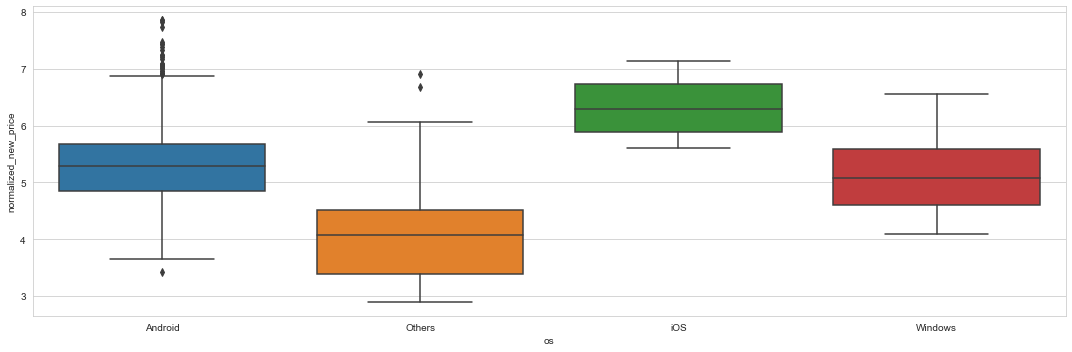

In [593]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="normalized_new_price")
plt.show()

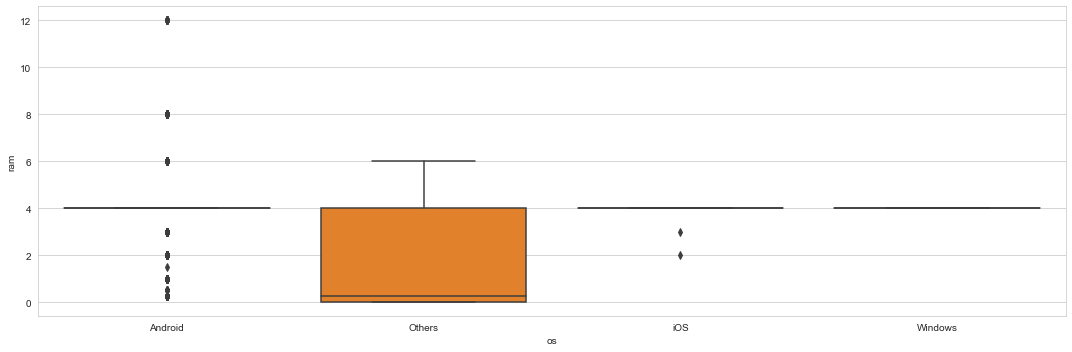

In [594]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="ram")
plt.show()

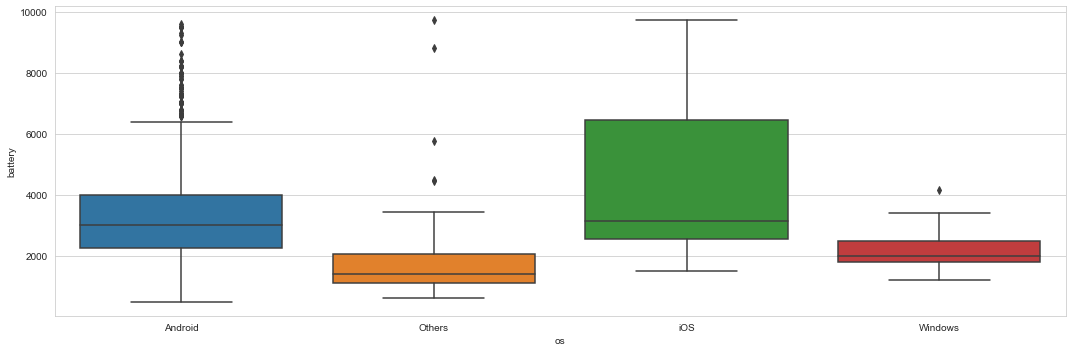

In [595]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="battery")
plt.show()

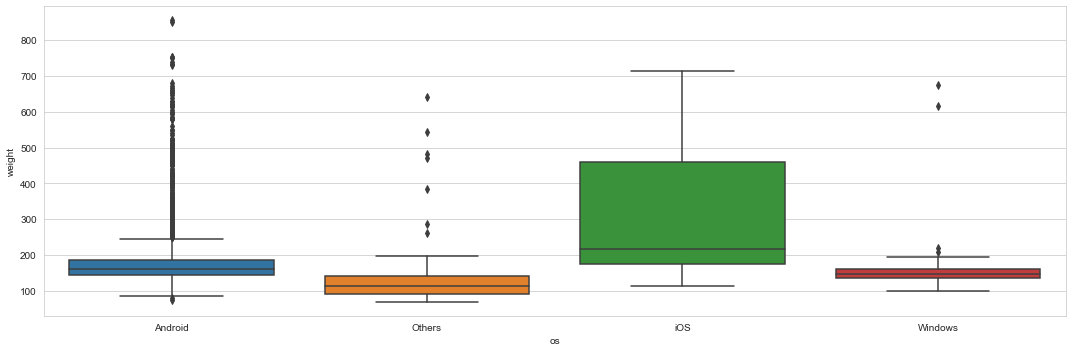

In [596]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="weight")
plt.show()

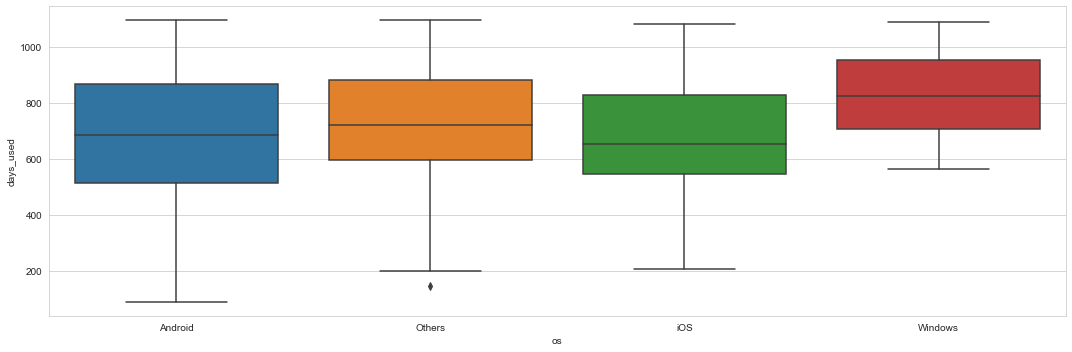

In [597]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="days_used")
plt.show()

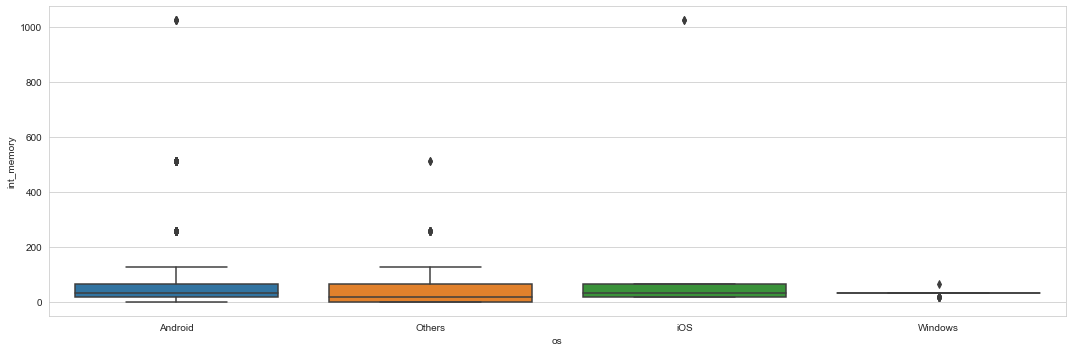

In [598]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cData, x="os", y="int_memory")
plt.show()

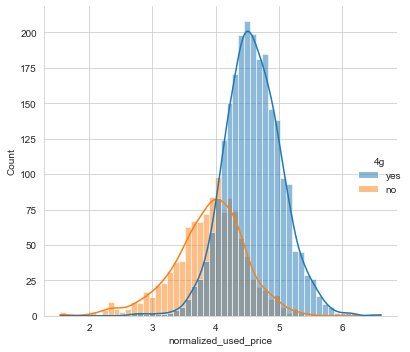

In [599]:
sns.displot(x = 'normalized_used_price', data = cData, hue = '4g', kde = True);

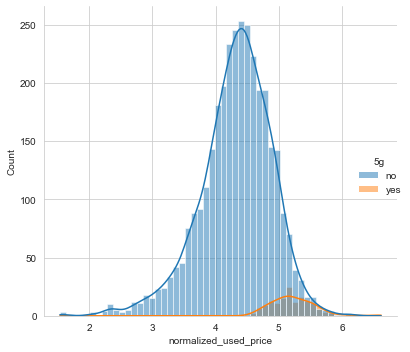

In [600]:
sns.displot(x = 'normalized_used_price', data = cData, hue = '5g', kde = True);

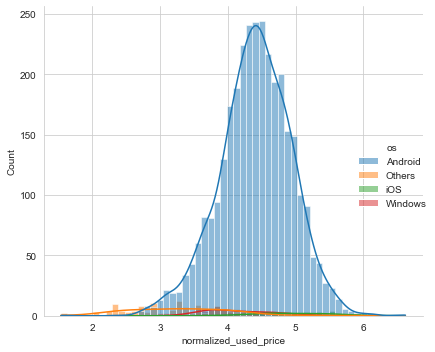

In [601]:
sns.displot(x = 'normalized_used_price', data = cData, hue = 'os', kde = True);

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

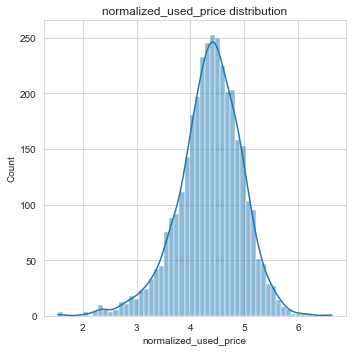

In [602]:
#1. What does the distribution of normalized used device prices look like?
plt.figure(figsize=(5, 5))
sns.histplot(cData["normalized_used_price"], kde=True)
plt.title("normalized_used_price distribution")
plt.show()

#####  The distribution is mostly normal and left skewed

In [603]:
#2. What percentage of the used device market is dominated by Android devices?

df = cData["os"].value_counts(normalize = 'True')
"{0:.2f}%".format(100 * df["Android"])

'93.05%'

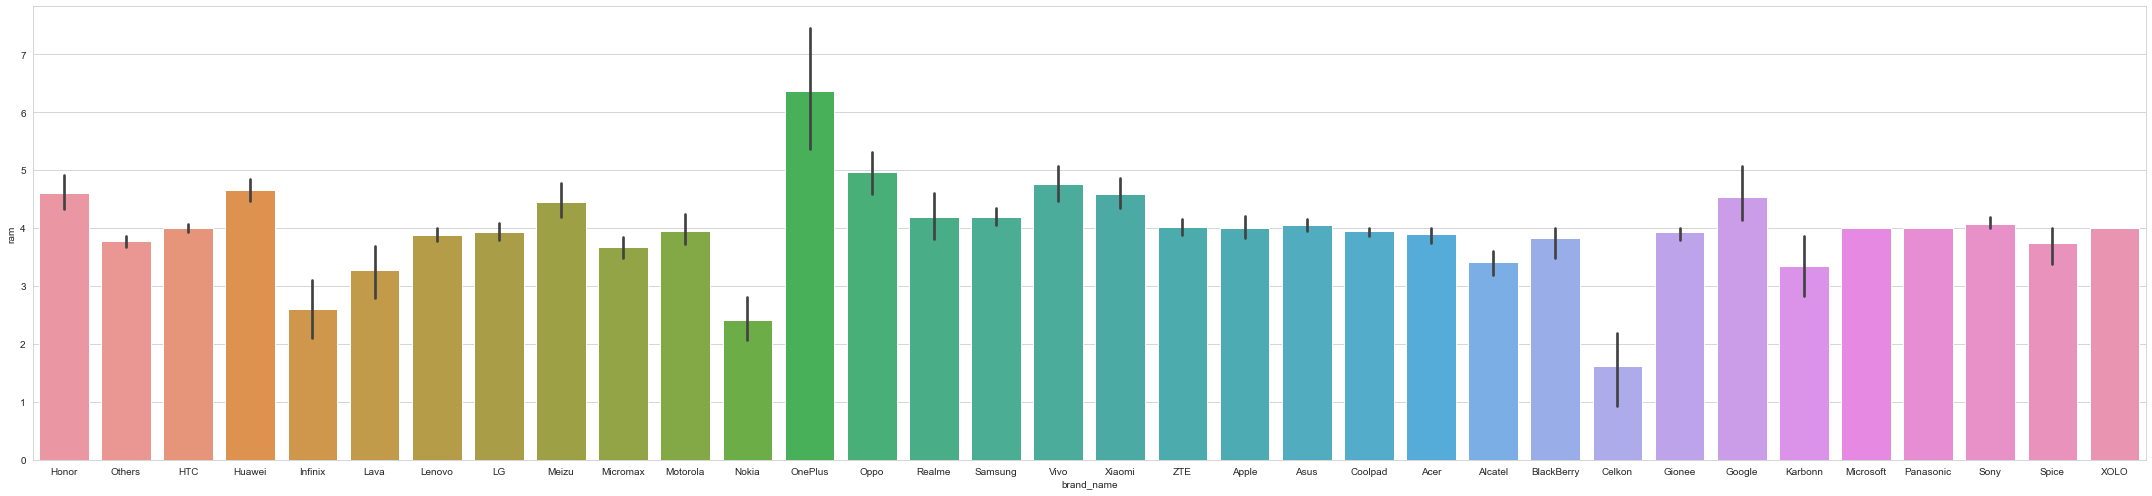

In [604]:
#3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

plt.figure(figsize=(30,7))
sns.barplot(x = 'brand_name', y = 'ram', data  =cData) ;

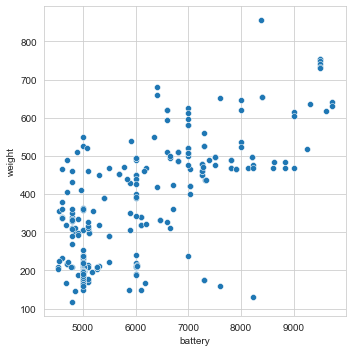

In [605]:
#4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering 
# large batteries (more than 4500 mAh)?
plt.figure(figsize=(5,5))
df_battery = cData.loc[cData['battery']> 4500]
df_battery
sns.scatterplot(data=df_battery, x='battery', y="weight");

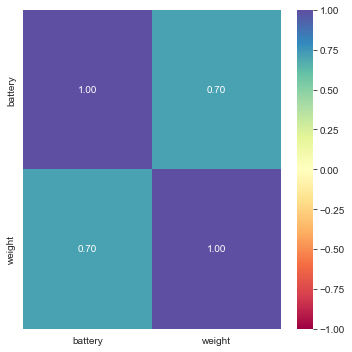

In [606]:
plt.figure(figsize=(5, 5))
cData_battery_weight = cData[["battery", "weight"]]
sns.heatmap(cData_battery_weight.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. 

In [607]:
#5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a 
# screen size larger than 6 inches?
df_screen_size = cData.loc[cData['screen_size']> 6]
df_screen_size.shape[0]

3362

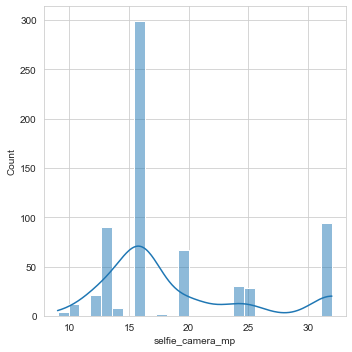

In [608]:
#6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 
# 8MP selfie cameras across brands?
plt.figure(figsize=(5, 5))
df_selfie = cData.loc[cData['selfie_camera_mp']> 8]
df_selfie
sns.histplot(df_selfie["selfie_camera_mp"], kde=True);

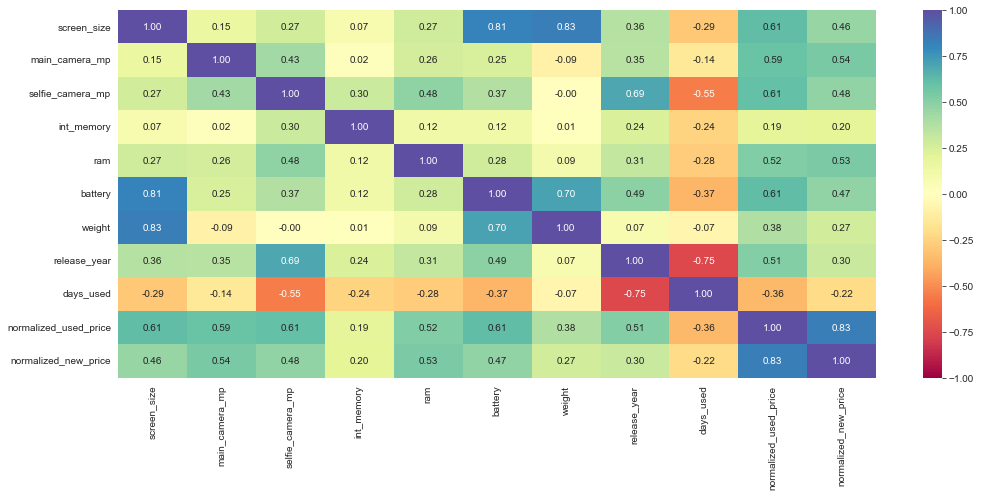

In [609]:
#7. Which attributes are highly correlated with the normalized price of a used device?

#col_list = ['normalized_used_price']
plt.figure(figsize=(15, 7))
sns.heatmap(cData.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. 
#### Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
#### Highly correlated variables are screen_size, weight, battery, normalised_used_price, normalised_new_price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [610]:
# Missing data
pd.DataFrame({'Count':cData.isnull().sum()[cData.isnull().sum()>0]})

,Count
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6
weight,7


In [611]:
# extract rows where column main_camera_mp is null
cData1 = cData.loc[cData["main_camera_mp"].isnull()]
cData1

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


In [612]:
# compute median for main_camera_mp
main_camera_mp_median_value = cData["main_camera_mp"].median()
main_camera_mp_median_value
#Replace with the median
cData["main_camera_mp"] = cData["main_camera_mp"].fillna(value = cData["main_camera_mp"].median())

In [613]:
# extract rows where column selfie_camera_mp is null
cData2 = cData.loc[cData["selfie_camera_mp"].isnull()]
cData2

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


In [614]:
#The number of rows are relatively small and this could be a case wherein the data is missing while data entry
cData.query('brand_name == "Google" & os == "Android" & main_camera_mp == 12.2') 

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083
1082,Google,Android,12.70,yes,no,12.2,8.0,64.0,4.0,2700.0,143.0,2017,890,4.825028,6.310845
1083,Google,Android,15.24,yes,no,12.2,8.0,64.0,4.0,3520.0,175.0,2017,554,5.247761,6.272367
3187,Google,Android,15.32,yes,no,12.2,8.0,64.0,6.0,3700.0,193.0,2019,487,4.870146,6.358102
3188,Google,Android,12.88,yes,no,12.2,8.0,64.0,6.0,2800.0,162.0,2019,203,5.153812,6.181362
3189,Google,Android,15.24,yes,no,12.2,8.0,64.0,4.0,3700.0,167.0,2019,318,4.877942,5.692553
3190,Google,Android,12.85,yes,no,12.2,8.0,64.0,4.0,3000.0,147.0,2019,508,4.470610,5.537925
3328,Google,Android,15.32,yes,no,12.2,8.0,64.0,6.0,3700.0,193.0,2019,429,4.600560,6.358102
3329,Google,Android,12.88,yes,no,12.2,8.0,64.0,6.0,2800.0,162.0,2019,464,5.037342,6.181362


In [615]:
#Replace with value 8
cData["selfie_camera_mp"] = cData["selfie_camera_mp"].fillna(value = 8)

In [616]:
# extract rows where column int_memory is null
cData3 = cData.loc[cData["int_memory"].isnull()]
cData3

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [617]:
# compute median for int_memory
int_memory_data = cData.query('brand_name == "Nokia" & os == "Others"') 
int_memory_median_value = int_memory_data["int_memory"].median()
int_memory_median_value
#Replace with the median
cData["int_memory"] = cData["int_memory"].fillna(value = int_memory_median_value)

In [618]:
# extract rows where column ram is null
cData4 = cData.loc[cData["ram"].isnull()]
cData4

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [619]:
# compute median for ram
ram_data = cData.query('brand_name == "Nokia" & os == "Others"') 
ram_median_value = ram_data["ram"].median()
ram_median_value
#Replace with the median
cData["ram"] = cData["ram"].fillna(value = ram_median_value)

In [620]:
# extract rows where column battery is null
cData5 = cData.loc[cData["battery"].isnull()]
cData5

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,82.6,2016,1023,2.765060,3.657905


In [621]:
Battery1 = cData.query('brand_name == "Meizu" & os == "Android"') 
Battery2 = cData.query('brand_name == "Microsoft" & os == "Windows"') 
Battery3 = cData.query('brand_name == "Nokia" & os == "Others"') 
Battery1_median_value = Battery1["battery"].median()
print(Battery1_median_value)
Battery2_median_value = Battery2["battery"].median()
print(Battery2_median_value)
Battery3_median_value = Battery3["battery"].median()
print(Battery3_median_value)


3150.0
2500.0
1200.0


In [622]:
Battery1["battery"] = Battery1["battery"].fillna(value = Battery1_median_value)

In [623]:
Battery2["battery"] = Battery2["battery"].fillna(value = Battery2_median_value)

In [624]:
Battery3["battery"] = Battery3["battery"].fillna(value = Battery3_median_value)

In [625]:
cData.update(Battery1)

In [626]:
cData.update(Battery2)

In [627]:
cData.update(Battery3)

In [628]:
# extract rows where column weight is null
cData6 = cData.loc[cData["weight"].isnull()]
cData6

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015.0,576.0,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015.0,800.0,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015.0,878.0,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015.0,1036.0,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015.0,679.0,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015.0,838.0,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015.0,1045.0,4.184642,4.785406


In [629]:
# compute median for weight
weight_data = cData.query('brand_name == "XOLO"') 
weight_median_value = weight_data["weight"].median()
weight_median_value
#Replace with the median
cData["weight"] = cData["weight"].fillna(value = weight_median_value)

In [630]:
# Missing data
pd.DataFrame({'Count':cData.isnull().sum()[cData.isnull().sum()>0]})

,Count


#### We have now treated the missing data rows in the data set

#### Outlier detection 

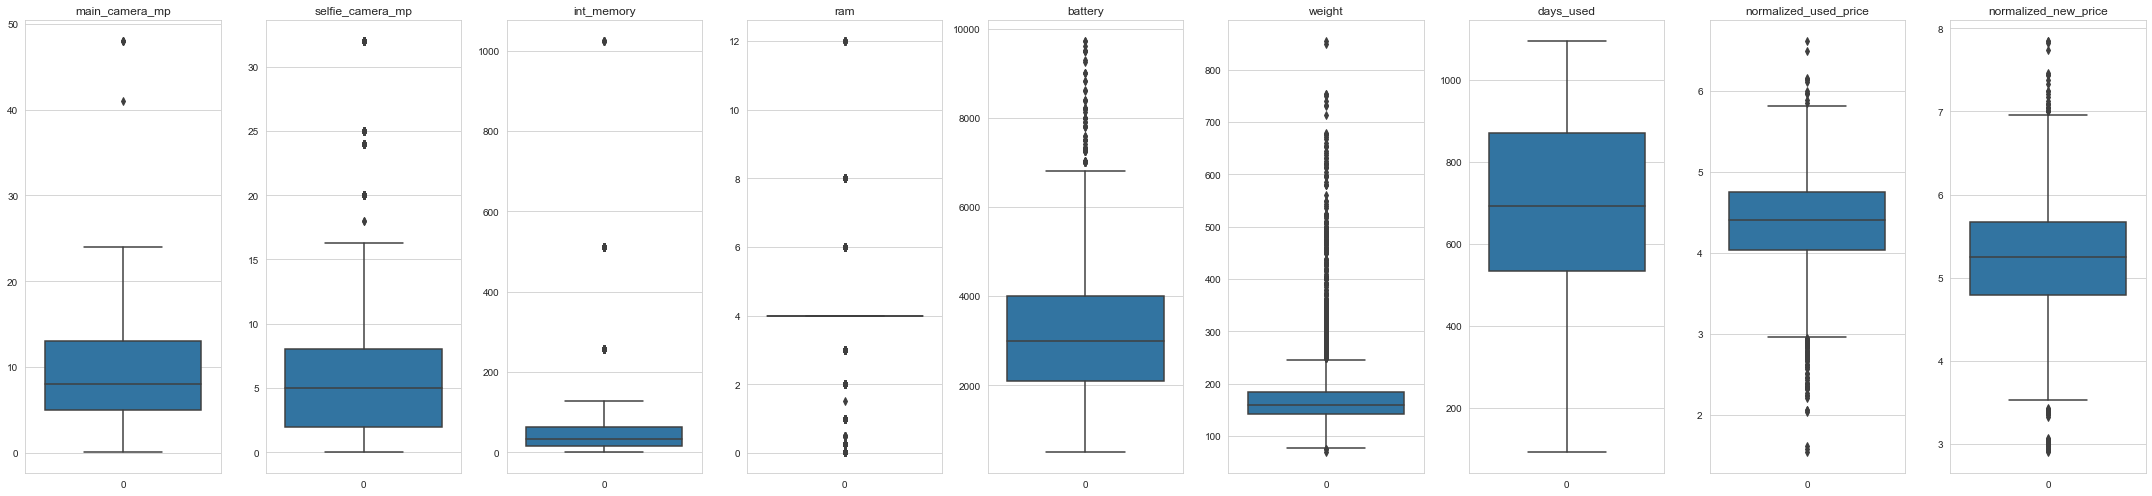

In [631]:
#Outlier detection and treatment (if needed)

# Store the list of columns
columns_to_plot = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price' ]

# Create the figure and two subplots
fig, axes = plt.subplots(1, ncols=len(columns_to_plot), figsize=(30, 7))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=cData[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.show()


#### Outlier treatment is done after in depth analysis along with the business. Let's consider this is to be out of scope for this project
- There are quite a few outliers in the data
- However, we will not treat them as they might be proper values

### Prepare data for modeling

- We want to predict the price of a used phone/tablet and identify factors that significantly influence it.
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [632]:
cData_For_model = cData.copy()

In [633]:
#We will be dropping the 'brand_name' column for prediction purposes.
cData_For_model = cData_For_model.drop(["brand_name"], axis=1)

In [634]:
cData_For_model["os"] = cData_For_model["os"].replace({1: "Android", 2: "iOS", 3: "Others", 4: "Windows"})
cData_For_model.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.389995,4.947837


In [635]:
cData_For_model["4g"] = cData_For_model["4g"].replace({1: "no", 2: "yes",})
cData_For_model.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.389995,4.947837


In [636]:
cData_For_model["5g"] = cData_For_model["5g"].replace({1: "no", 2: "yes",})
cData_For_model.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.389995,4.947837


In [637]:
cData_For_model["release_year"] = cData_For_model["release_year"].astype(int)
#cData_For_model["release_year"].unique()
cData_For_model["release_year"] = cData_For_model["release_year"].astype(str)
cData_For_model["release_year"]=cData_For_model["release_year"].str[2:] #extract last 2 digits (yy) of the year
cData_For_model["release_year"] = cData_For_model["release_year"].astype(int)

In [638]:
cData_For_model.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,20,127.0,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,20,325.0,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,20,162.0,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,20,345.0,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,20,293.0,4.389995,4.947837


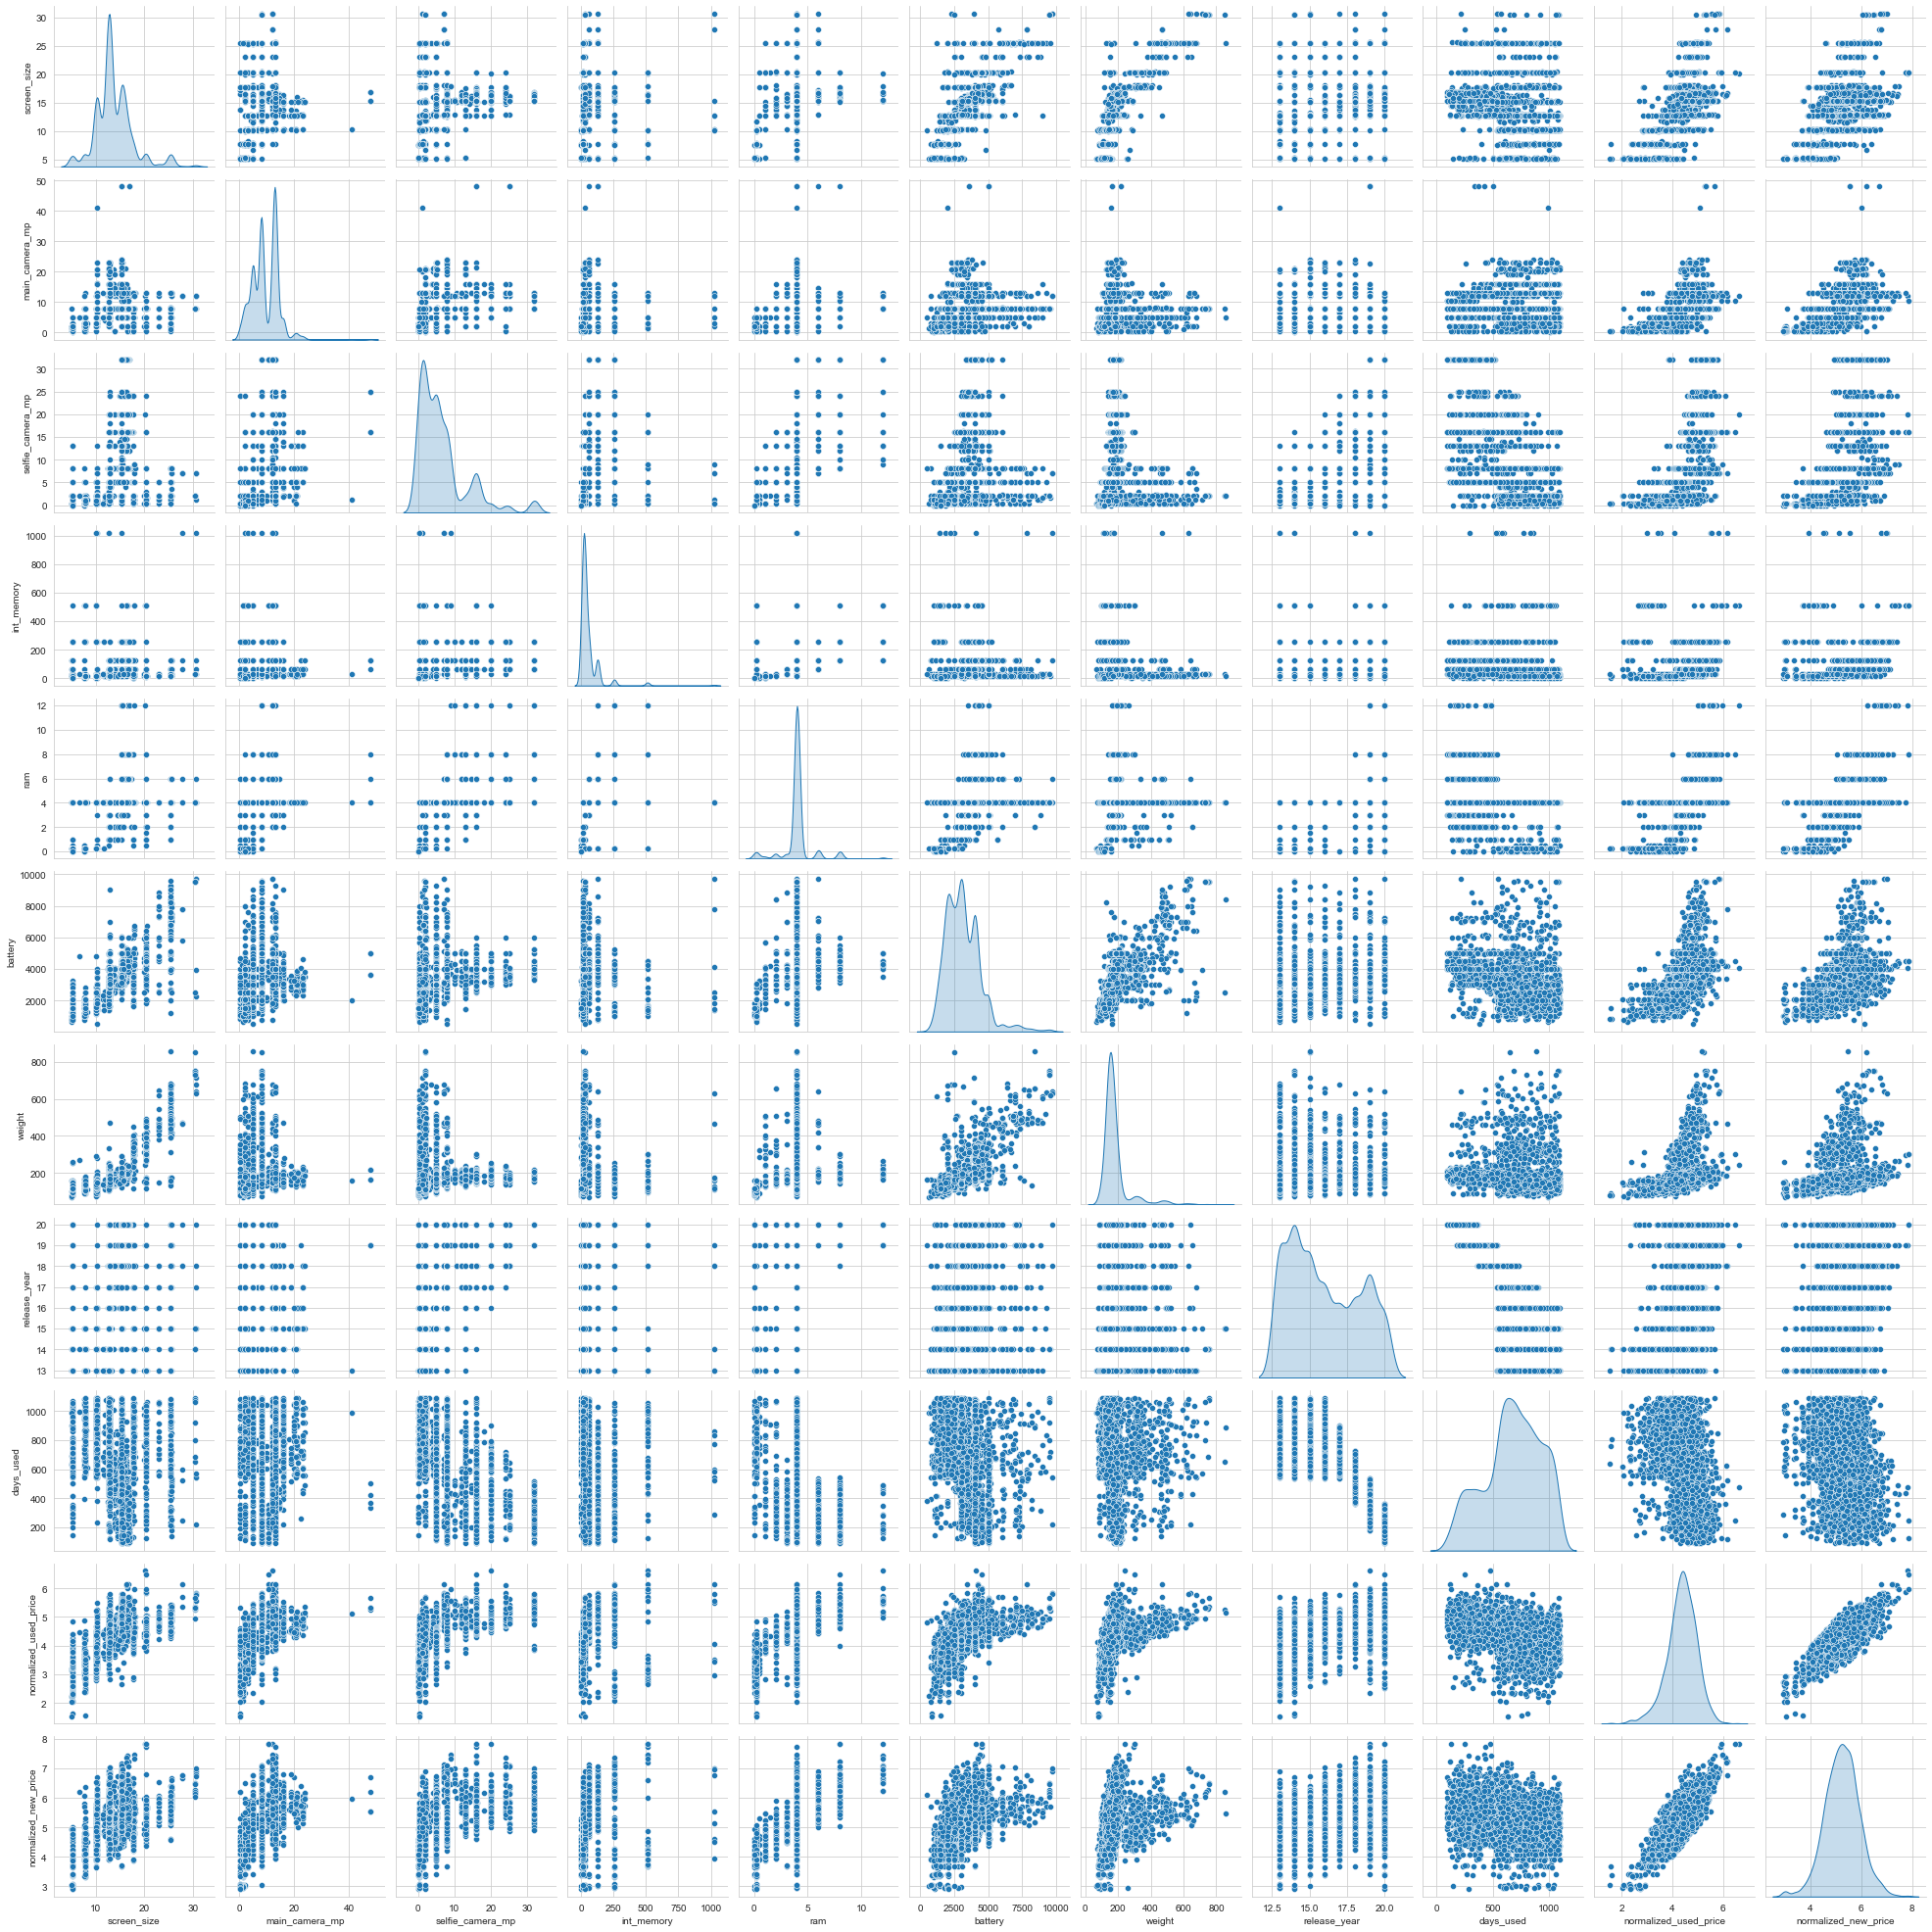

In [639]:
cData_For_model_attr = cData_For_model.iloc[:, 0:14]
sns.pairplot(
    cData_For_model_attr, diag_kind="kde"
) 

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [640]:
# let's check the shape of the data
cData.shape

(3454, 15)

In [641]:
# let's check the statistical summary of the data
cData.describe().T

#observe the change to the mean and std dev aftre imputation

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.384534,4.700148,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.509968,84.943382,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.031471,1.371136,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.114215,1299.430728,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [642]:
cData_For_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   os                     3454 non-null   object 
 1   screen_size            3454 non-null   float64
 2   4g                     3454 non-null   object 
 3   5g                     3454 non-null   object 
 4   main_camera_mp         3454 non-null   float64
 5   selfie_camera_mp       3454 non-null   float64
 6   int_memory             3454 non-null   float64
 7   ram                    3454 non-null   float64
 8   battery                3454 non-null   float64
 9   weight                 3454 non-null   float64
 10  release_year           3454 non-null   int64  
 11  days_used              3454 non-null   float64
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 377.9+

In [643]:
#numerical columns
num_cols = cData_For_model.dtypes[cData_For_model.dtypes != 'object'].index.tolist()
print(num_cols)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


In [644]:
#object columns
obj_cols = cData_For_model.dtypes[cData_For_model.dtypes == 'object'].index.tolist()
print(obj_cols)

['os', '4g', '5g']


In [645]:
#discrete or categorical columns cat_cols = obj_cols + disc_cols
disc_cols = ['os', '4g', '5g']
print(disc_cols)

['os', '4g', '5g']


#### Thanks to Gaurav (my mentor), I have borrowed the below custom generic functions from him which is very handy

In [646]:
def find_r_c(cols):

    size = len(cols) #12, 13, 26

    c = 3
    if len(cols)%c == 0:
        r = int(len(cols)/c)  # 12/3 = 4
    else:
        r = int(len(cols)/c)+1 # 4+ 1, 8 +1 
        
    return r,c

In [647]:
# Custom function for univariate visualization of Numerical Variables -

def UVA_numerical(data, num_cols, graph_type): # check for continuity 

    '''
    Univariate_Analysis_numerical
    takes a group of variables (numerical) and plots distributions.
    '''
    r,c = find_r_c(num_cols)
    
    plt.rcParams["figure.figsize"] = [20, 5*r] # w, h
    plt.rcParams["figure.autolayout"] = True 

    count = 1
#     plt.tight_layout()
    for i,j in enumerate(num_cols): # range(len(num_cols)):
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 1) # aesthetic
        
        if graph_type == 'dist':       
            sns.distplot(data[[num_cols[i]]]) # df[j]
            plt.title(j) # font_size()
        elif graph_type == 'box':
            sns.boxplot(data[num_cols[i]]) # df[j]
            plt.title(j)

        count += 1

In [648]:
# Custom function for univariate visualization of Categorical Variables

def UVA_category(data, cat_cols): #cat_cols = obj_cols + disc_cols 

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    r,c = find_r_c(cat_cols)

    plt.rcParams["figure.figsize"] = (10, 5) #5*r    

    count = 1
    for i in cat_cols:
        norm_count = round(data[i].value_counts(normalize = True),4)
        s = str(norm_count).split('Name')[0]
        n_uni = data[i].nunique()

        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 0.5)
        sns.countplot(x = data[i])
        plt.xlabel('{}'.format(i), fontsize = 10)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,s), size = 14)

        count += 1

In [649]:
# # # Custom function for univariate visualization of Numerical Variables -

def UVA_numerical_updated(data, cols):
    '''
    This takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''
    
    r,c = find_r_c(cols)

    plt.rcParams['figure.figsize'] = [20, 5*r]
        
    count = 1
    #looping for each variable
    for i in cols:

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        coef_var = st_dev/mean*100

        # calculating mu +- 1*sigma 
        m1s = mean-st_dev, mean+st_dev
        
        # rounding off
        mean = round(mean,2)
        median = round(median,2)
        mini = round(mini,2) 
        maxi = round(maxi,2)
        ran = round(ran,2)
        st_dev = round(st_dev,2)
        m1s = [round(i) for i in m1s]
        coef_var = round(coef_var,2)
        
        q1 = round(np.percentile(data[i], 25), 2)
        q2 = round(np.percentile(data[i], 50), 2)
        q3 = round(np.percentile(data[i], 75), 2)

        plt.subplot(r,c,count)
        
        sns.kdeplot(data[i], shade=True) 
        sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean", s=100)
        sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median/Q2", s = 50)
        sns.lineplot(x = m1s, y = [0,0], color = 'black', label = "m+-1s") # for drawing line
        sns.scatterplot(x = [q1,q3], y = [0,0], color = 'green', label = "Q1,Q3", s = 40)
        sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max", s = 100) # for plotting dot

        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.ylabel('density',fontsize = 15)
        
        titl = 'mean = {}; median = {}; std_dev = {}; \nmu+-sigma = {}; coef_var = {}%,\nmin = {}; max = {}; range = {};\nQ1,Q2,Q3 = {}'
        plt.title(titl.format(mean, median,st_dev,(m1s[0],m1s[1]), coef_var,  mini,  maxi,  ran, (q1,q2,q3)), fontsize = 14)
                  
        plt.legend(loc='upper right', fontsize = 13)
        
        count += 1

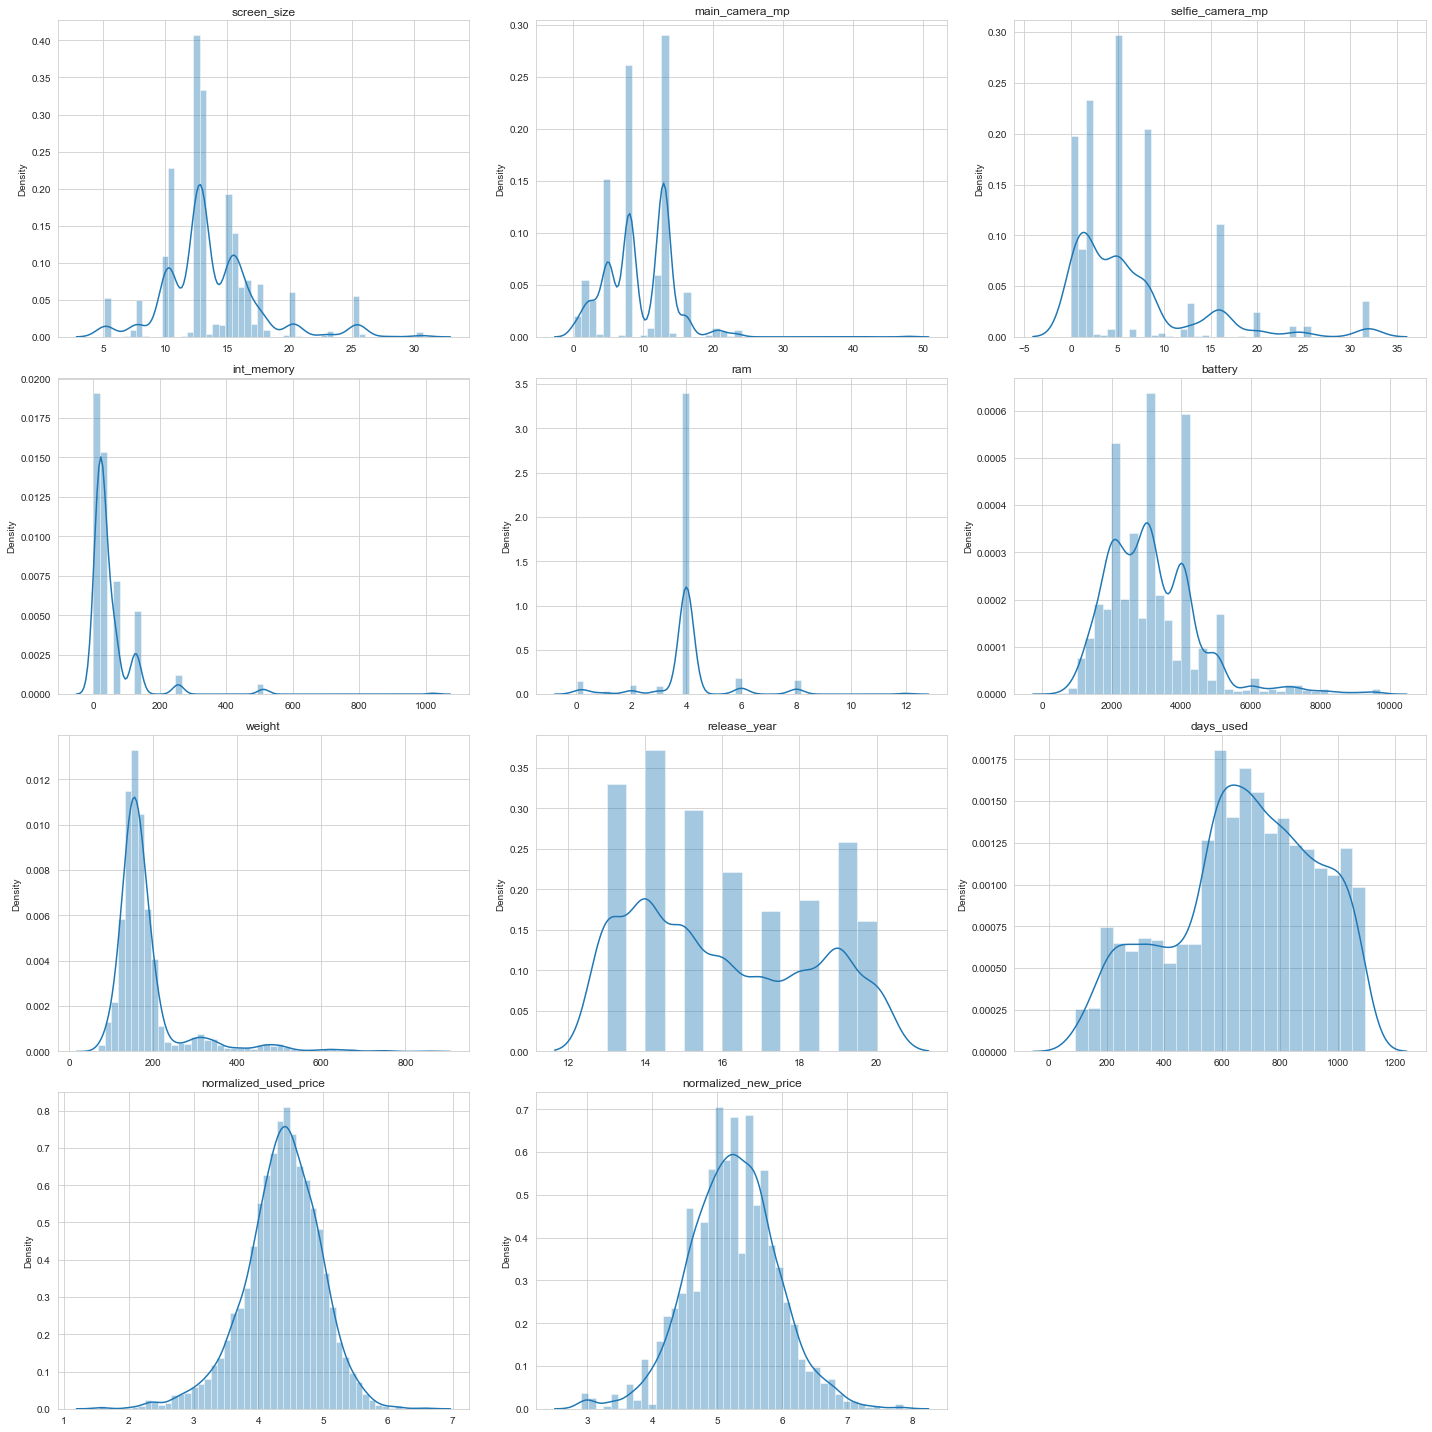

In [650]:
UVA_numerical(cData_For_model, num_cols, 'dist')
#!pip install "modin[all]"

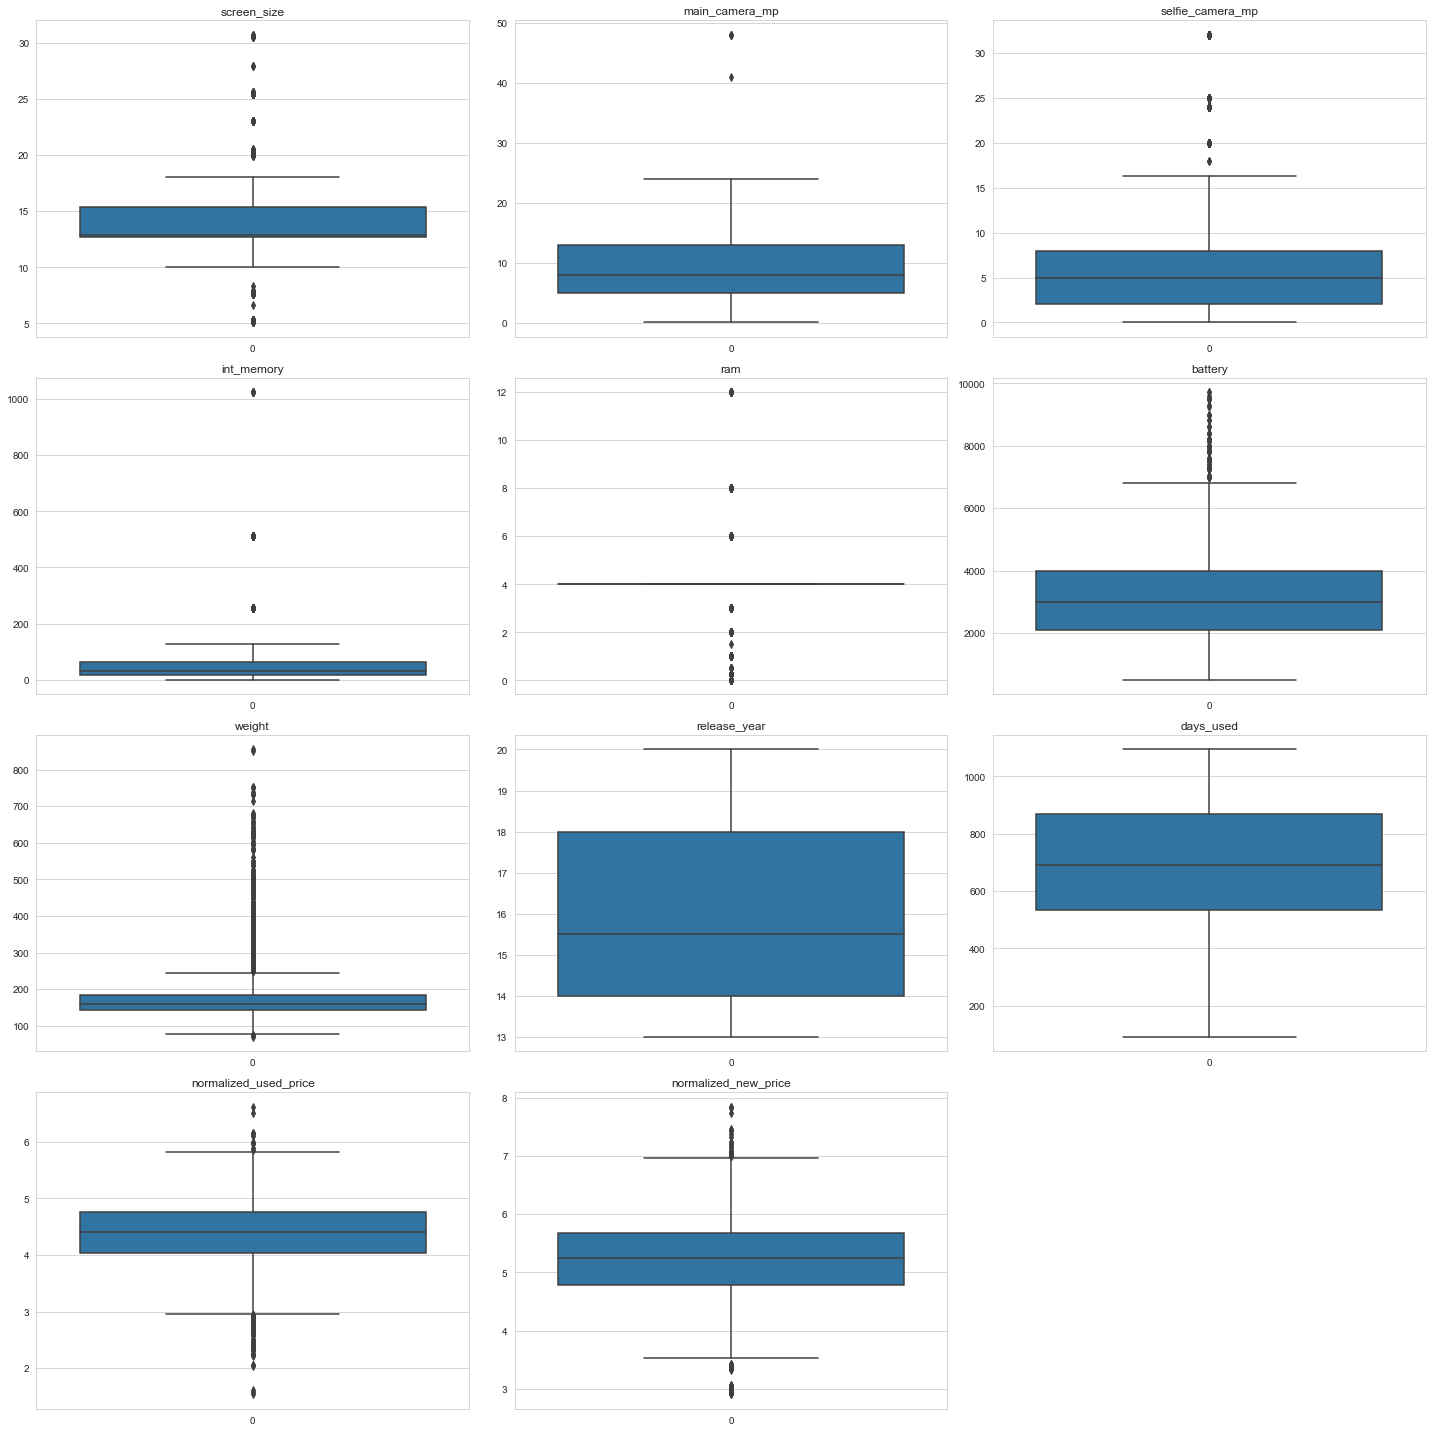

In [651]:
UVA_numerical(cData_For_model, num_cols, 'box')# box plot doesn't give idea of continuity

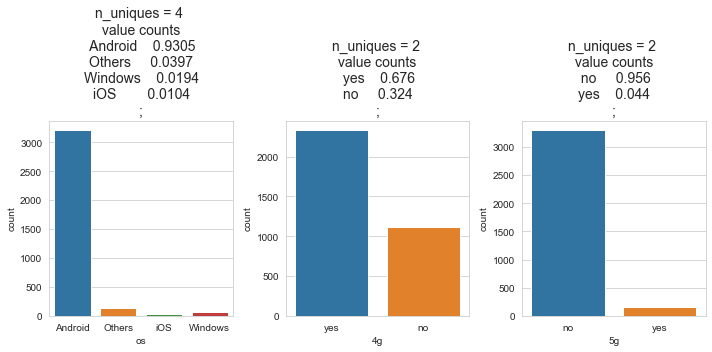

In [652]:
UVA_category(cData_For_model, disc_cols)

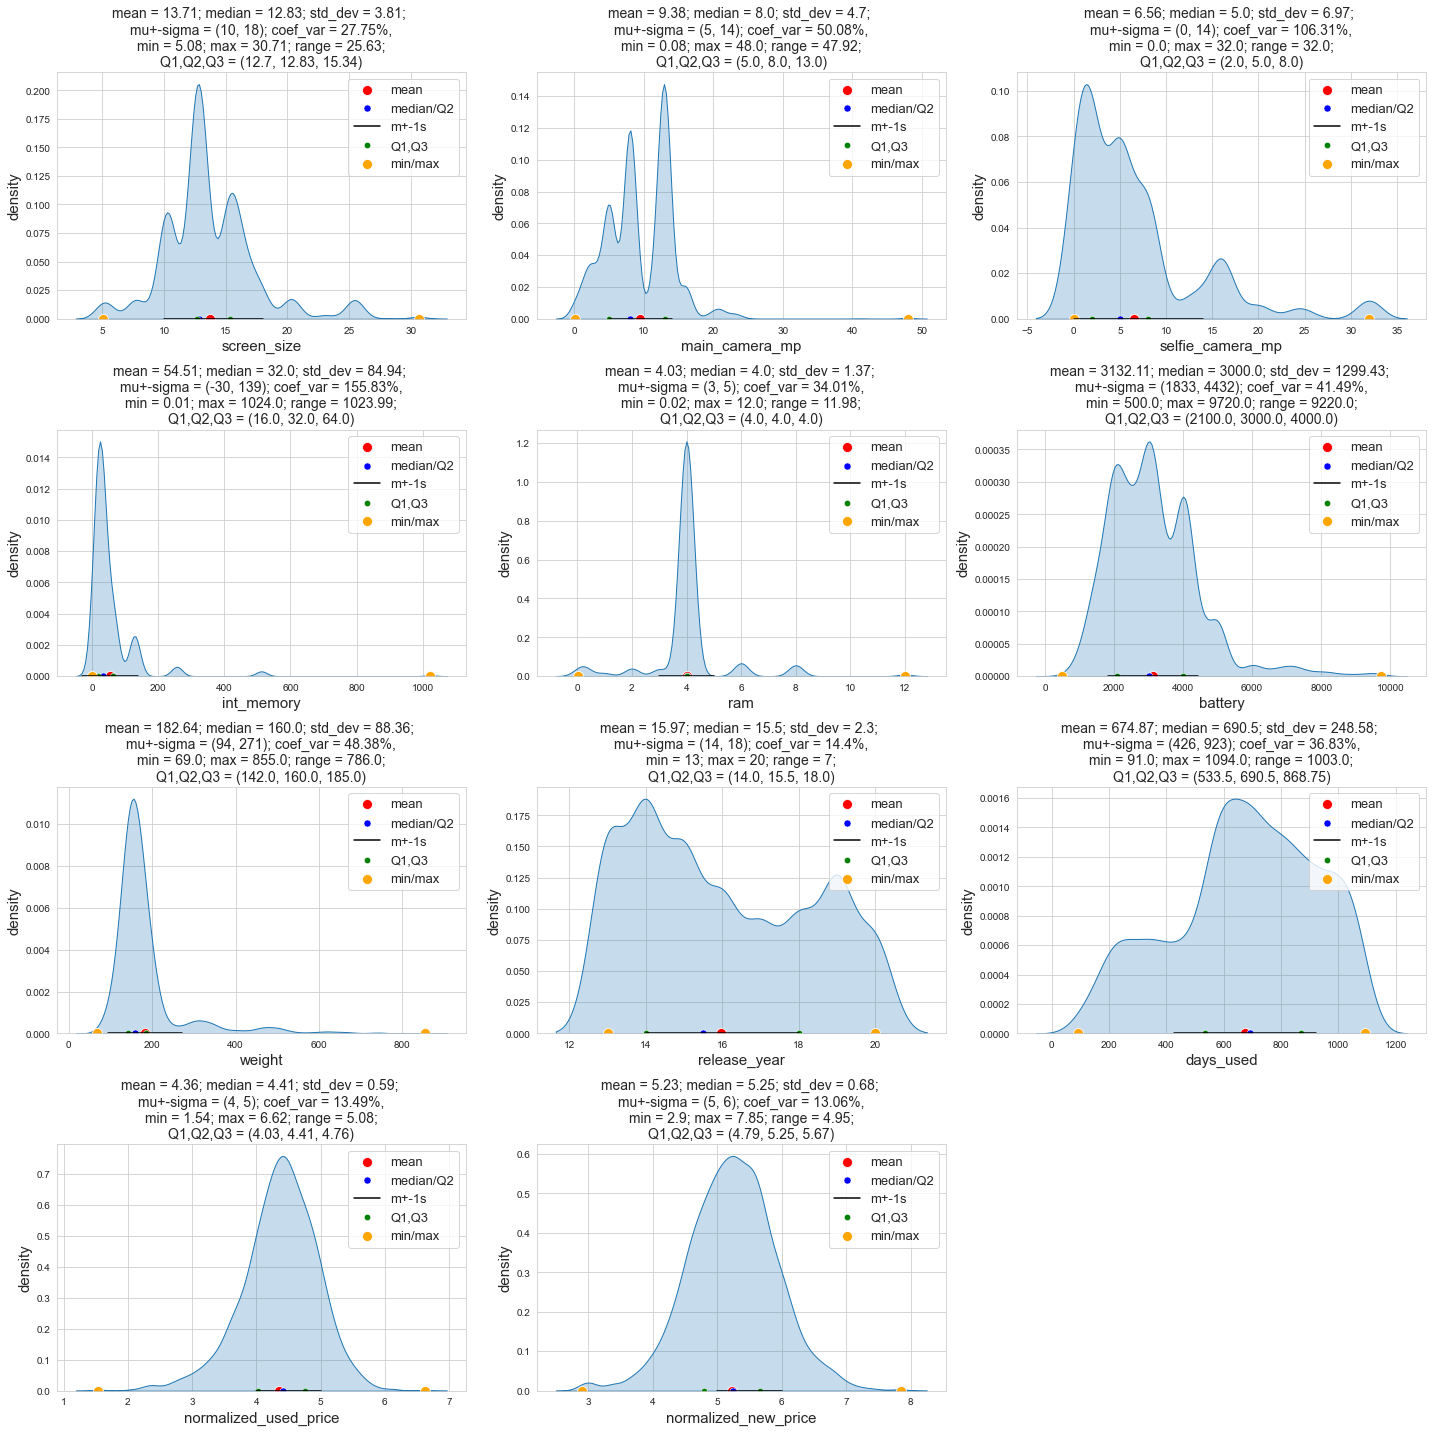

In [653]:
UVA_numerical_updated(cData_For_model, num_cols)

## Model Building - Linear Regression

### Create Dummy Variables

In [654]:
# create dummies
cData_For_model = pd.get_dummies(cData_For_model, columns=["os", "4g", "5g"], drop_first=True)
cData_For_model.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,20,127.0,4.307572,4.715100,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,20,325.0,5.162097,5.519018,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,20,162.0,5.111084,5.884631,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,20,345.0,5.135387,5.630961,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,20,293.0,4.389995,4.947837,0,0,0,1,0


### Split data

#### OLS model

In [655]:
# independent variables
x = cData_For_model.drop(["normalized_used_price"], axis=1)
# dependent variable
y = cData_For_model[["normalized_used_price"]]

##### Machine Learning model

In [656]:
# creating dummy variables for ML
xm = pd.get_dummies(
    X,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
xm.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,20,127.0,4.715100,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,20,325.0,5.519018,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,20,162.0,5.884631,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,20,345.0,5.630961,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,20,293.0,4.947837,0,0,0,1,0


In [657]:
ym = y.copy()
ym

,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995
...,...
3449,4.492337
3450,5.037732
3451,4.357350
3452,4.349762


In [658]:
 # let's add the intercept to data for OLS
x = sm.add_constant(x)

In [659]:
x

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,20,127.0,4.715100,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,20,325.0,5.519018,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,20,162.0,5.884631,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,20,345.0,5.630961,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,20,293.0,4.947837,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1.0,15.34,8.0,8.0,64.0,6.0,5000.0,190.0,19,232.0,6.483872,0,0,0,1,0
3450,1.0,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,18,541.0,6.251538,0,0,0,1,0
3451,1.0,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,20,201.0,4.528829,0,0,0,1,0
3452,1.0,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,20,149.0,4.624188,0,0,0,1,0


In [660]:
# splitting the data in 70:30 ratio for train to test data -- for ML

xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.3, random_state=1)

In [661]:
# splitting the data in 70:30 ratio for train to test data -- for OLS
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

In [662]:
print(xm_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  release_year  days_used  normalized_new_price  \
3026   1800.0   120.0            14      819.0              4.796204   
1525   4050.0   225.0            16      585.0              5.434595   
1128   2550.0   162.0            15      727.0              5.137914   
3003   3200.0   126.0            15      800.0              5.189228   
2907   2900.0   160.0            17      560.0              5.016220   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
3026          0           0       0   

In [663]:
print(x_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  release_year  days_used  normalized_new_price  \
3026   1800.0   120.0            14      819.0              4.796204   
1525   4050.0   225.0            16      585.0              5.434595   
1128   2550.0   162.0            15      727.0              5.137914   
3003   3200.0   126.0            15      800.0              5.189228   
2907   2900.0   160.0            17      560.0              5.016220   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
3026          0           0       0   

In [664]:
print(xm_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  weight  release_year  days_used  normalized_new_price  \
866    3000.0   206.0            14      632.0              5.190788   
957    1400.0   140.0            13      637.0              3.884652   
280    5000.0   185.0            20      329.0              4.487287   
2150   3200.0   148.0            17      648.0              5.639422   
93     3500.0   179.0            19      216.0              5.300415   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
866           0           0     

In [665]:
print(x_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  weight  release_year  days_used  normalized_new_price  \
866    3000.0   206.0            14      632.0              5.190788   
957    1400.0   140.0            13      637.0              3.884652   
280    5000.0   185.0            20      329.0              4.487287   
2150   3200.0   148.0            17      648.0              5.639422   
93     3500.0   179.0            19      216.0              5.300415   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
866           0           0     

### Fit Linear Model

### Machine Learning sklearn

In [666]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # ML

In [667]:
lr = LinearRegression()
lr.fit(xm_train, ym_train)
print(lr.score(xm_train, ym_train))
print(lr.score(xm_test, ym_test))

0.8410568743639626
0.8444957114400093


In [668]:
lr.predict(xm_train), ym_train.values

(array([[3.8570665 ],
        [4.58582372],
        [4.28425179],
        ...,
        [4.83510559],
        [5.08644513],
        [4.42607735]]),
 array([[4.08748777],
        [4.44839941],
        [4.3153525 ],
        ...,
        [4.74327859],
        [5.18020928],
        [4.78323269]]))

In [669]:
lr.predict(xm_test), ym_test.values

(array([[4.23034767],
        [3.32630178],
        [4.13884111],
        ...,
        [2.64136636],
        [3.98507808],
        [3.8169411 ]]),
 array([[4.03883185],
        [2.80032548],
        [4.37071287],
        ...,
        [1.53686722],
        [4.18082802],
        [3.74004774]]))

In [670]:
lr_la = Lasso(alpha = 100) # L1 -->it might make the Beta coeff 0--> y = B0 + B1*X1 + B2*X2 +...Bn*Xn+ alpha*sum(|Bj|, j= 1 to n)
lr_la.fit(xm_train, ym_train)
print(lr_la.score(xm_train, ym_train)) # .score means R2 
print(lr_la.score(xm_test, ym_test))

0.35787475629765053
0.35422510022294895


#### Lasso, ridge, or elastic net with alpha = 0 means it is linear regression with no regularization

In [671]:
lr_ri = Ridge(alpha= 100) #l2-->it will never make the Beta coeff 0--> y = B0 + B1*X1 + B2*X2+..Bn*Xn+ alpha*sum(|Bj|^2, j= 1 to n)
lr_ri.fit(xm_train, ym_train)
print(lr_ri.score(xm_train, ym_train)) # .score means R2 
print(lr_ri.score(xm_test, ym_test))

0.8378944478487966
0.8397068925559127


In [672]:
lr_en = ElasticNet(alpha = 0.5,l1_ratio = 0.5) # elastic net is a combination of lasso and ridge
lr_en.fit(xm_train, ym_train)
print(lr_en.score(xm_train, ym_train)) # .score means R2 
print(lr_en.score(xm_test, ym_test))

0.6685631685884912
0.6452184397674552


#### For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

### OLS model

In [673]:
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()

In [674]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     847.0
Date:                   Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:08:04   Log-Likelihood:                 94.383
No. Observations:                   2417   AIC:                            -156.8
Df Residuals:                       2401   BIC:                            -64.12
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Interpretation of olsres.summary()

* Dep. Variable:    Dependent or target variable for which the regression analysis is performed. In this project we would like to analyse the effect of independent variables on dependant column normalized_used_price

* Model & Method:   The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑ei2 ). The model tries to find out a linear expression for the dataset which minimizes the sum of residual squares.

* No. Observations:  The number of observation is the size of our sample, i.e. N = 2417. (70% of the sample size)

* Df Residuals:      Degree of freedom is the number of independent observations on the basis of which the sum of squares is calculated. Degree of freedom(D.f) is calculated as, D.f  = N – K Where, N = sample size(no. of observations) and  K = number of variables + 1. We have 2417 observations and 16 features. Out of 16 features, 15 features are independent. DF Model is therefore 15. DF residual is calculated from total observation-DF model-1 which is 2417–15–1 = 2401 in our case.

* Df Model:           K – 1 Where, K = number of variables + 1. We have 2417 observations and 16 features. Out of 16 features, 15 features are independent. DF Model is therefore 15. 

* Covariance Type:    Covariance type is typically nonrobust which means there is no elimination of data to calculate the covariance between features. Covariance shows how two variables move with respect to each other. If this value is greater than 0, both move in same direction and if this is less than 0, the variables mode in opposite direction. Covariance is difference from correlation. Covariance does not provide the strength of the relationship, only the direction of movement whereas, correlation value is normalized and ranges between -1 to +1 and correlation provides the strength of relationship. If we want to obtain robust covariance, we can declare cov_type=HC0/HC1/HC2/HC3. However, the statsmodel documentation is not that rich to explain all these. HC stands for heteroscedasticity consistent and HC0 implements the simplest version among all.

* R-squared:          This value tells us that our model can explain 84.1% of the variance in the training set.

* Adj. R-squared:     As we add more and more independent variables to our model, the R-squared values increases but in reality, those variables do not necessarily make any contribution towards explaining the dependent variable. Therefore addition of each unnecessary variables needs some sort of penalty. The original R-squared values is adjusted when there are multiple variables incorporated. In essence, we should always look for adjusted R-squared value while performing multiple linear regression. For a single independent variable, both R-squared and adjusted R-squared value are same. Our model has an adjusted R-squared value of 84.0%.

* F-statistic:        If the F-statistic is large and the associated p-value is small (below a predetermined significance level), typically 0.05, it suggests that at least one of the independent variables has a statistically significant relationship with the dependent variable. This indicates that the regression model provides a better fit than an intercept-only model.

* Prob (F-statistic):  If Prob(F-statistic) is greater than 0.05, there is no evidence of relationship between any of the independent variable with the output. If it is less than 0.05, we can say that there is at least one variable which is significantly related with the output. 

* Log-Likelihood:      The log-likelihood value is a measure for fit of the model with the given data. It is useful when we compare two or more models. The higher the value of log-likelihood, the better the model fits the given data. It can range from negative infinity to positive infinity.

* AIC & BIC:           AIC (stands for Akaike’s Information Criteria developed by Japanese statistician Hirotugo Akaike) and BIC (stands for Bayesian Information Criteria) are also used as criteria for model robustness. The goal is to minimize these values to get a better model. 

* const:               The constant terms is the intercept of the regression line. It is the Y-intercept.
  - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
  - In our case, the value for `const` coefficient is **0.8279**

* coef:                The coefficient term tells the change in Y for a unit change in X 

* std err:             Standard error shows the sampling variability of these parameters. It is the standard deviation of the corresponding variable’s coefficient across all the data points.

* t                    T-statistics are used to calculate the p-values. In theory, we assume that error term follows the normal distribution t – statistics are calculated by assuming  following hypothesis – 

                       H0  : B2  = 0      (variable X has no influence on Y)
                       Ha  : B2  ≠ 0      (X has significant impact on Y)

* P>|t|               Typically when p-value is less than 0.05, it indicates a strong evidence against null hypothesis which states that the corresponding independent variable has no effect on the dependent variable. It seems that some of the dummyified columns are **NOT statistically significant since their p values > 0.05**

* [0.025      0.975]  This is the confidence interval for each of the independent variables. Null hypothesis can be validated using Confidence Interval approach

* Omnibus & Prob(Omnibus): Omnibus test checks the normality of the residuals once the model is deployed. If the value is zero, it means the residuals are perfectly normal. For a model to be robust, besides checking R-squared and other rubrics, the residual distribution is also required to be normal ideally. In other words, the residual should not follow any pattern when plotted against the fitted values.

* Skew & Kurtosis:      Skew values tells us the skewness of the residual distribution. Normally distributed variables have 0 skew values. Kurtosis is a measure of light tailed or heavy-tailed distribution compared to normal distribution. High kurtosis indicates the distribution is too narrow and low kurtosis indicates the distribution is too flat. A kurtosis value between -2 and +2 is good to prove normalcy.
Kurtosis is 4.6 (>3) --> positive kurotsis --> long tail

Skew is -0.615 (not between -0.5 and 0.5) --> not very symmetrical

* Durbin-Watson:        Durbin-Watson statistic provides a measure of autocorrelation in the residual. If the residual values are autocorrelated, the model becomes biased and it is not expected. This simply means that one value should not be depending on any of the previous values. An ideal value for this test ranges from 0 to 4.

* Jarque-Bera (JB) & Prob(JB):  Jarque-Bera (JB) and Prob(JB) is similar to Omni test measuring the normalcy of the residuals.

* Cond. No.:           High condition number indicates that there are possible multicollinearity present in the dataset. If only one variable is used as predictor, this value is low and can be ignored. 

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [675]:
# function to compute adjusted R-squared

from sklearn.metrics import r2_score
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(model, targets, predictions):
    if model == 'OLS':
        return np.mean(np.abs(targets.iloc[:,0] - predictions) / targets.iloc[:, 0]) * 100
    else:
        mean_val = np.mean(np.abs(targets - predictions) / targets) * 100
        #print(mean_val[0])
        #return np.mean(np.abs(targets - predictions) / targets) * 100
        return mean_val[0]


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    if model == 'OLS':
        olsmod = sm.OLS(target, predictors)
        olsres = olsmod.fit()
        # predicting using the independent variables
        pred = olsres.predict(predictors)
        
    else: 
        # predicting using the independent variables
        pred = model.predict(predictors)
        
    
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(model, target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [676]:
# checking model performance on train set (seen 70% data) ---> OLS
print("Training Performance for OLS\n")
olsmodel_train_perf = model_performance_regression('OLS', x_train, y_train)
olsmodel_train_perf

Training Performance for OLS



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232704,0.18291,0.841057,0.839997,4.391402


In [677]:
# checking model performance on test set (seen 30% data) --> OLS
print("Test Performance for OLS\n")
olsmodel_test_perf = model_performance_regression('OLS', x_test, y_test)
olsmodel_test_perf

Test Performance for OLS



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235414,0.181168,0.846346,0.843936,4.39216


In [678]:
# checking model performance on train set (seen 70% data) --> ML
print("Training Performance for ML\n")
olsmodel_train_perf = model_performance_regression(lr, xm_train, ym_train)
olsmodel_train_perf

Training Performance for ML



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232704,0.18291,0.841057,0.839997,4.391402


In [679]:
# checking model performance on test set (seen 30% data) --> ML
print("Test Performance for ML\n")
olsmodel_test_perf = model_performance_regression(lr, xm_test, ym_test)
olsmodel_test_perf

Test Performance for ML



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236827,0.182346,0.844496,0.842056,4.45368


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict the used price within a mean error of 0.18 on the test data

- MAPE of 4.4 on the test data means that we are able to predict within 4.4% of the used price 

### Check for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [680]:
# let's check the VIF of the predictors
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1.sort_values(ascending= False)))

VIF values: 

const                   426.654275
screen_size               7.247938
weight                    6.104382
release_year              4.615403
battery                   3.838533
normalized_new_price      2.658841
days_used                 2.589295
selfie_camera_mp          2.576886
4g_yes                    2.268943
ram                       2.124542
main_camera_mp            1.925403
5g_yes                    1.763889
os_Others                 1.484067
int_memory                1.245986
os_iOS                    1.089046
os_Windows                1.023392
dtype: float64



* VIF > 5 indicates high multicollinearity. In this data set columns screen_size and weight show high multicollinearity
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [681]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for col in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:,~predictors.columns.str.startswith(col)] # x_train = x_train.drop(col, axis = 1)

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [693]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.836888,0.235785
1,screen_size,0.836304,0.236206


In [694]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

In [695]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
    index=x_train2.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2.sort_values(ascending= False)))

VIF values: 

const                   425.829063
release_year              4.458922
battery                   3.598316
weight                    2.854012
normalized_new_price      2.629797
days_used                 2.576625
selfie_camera_mp          2.572104
4g_yes                    2.268102
ram                       2.123965
main_camera_mp            1.920993
5g_yes                    1.761027
os_Others                 1.264717
int_memory                1.245363
os_iOS                    1.086695
os_Windows                1.023336
dtype: float64



In [696]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     882.6
Date:                   Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:19:47   Log-Likelihood:                 65.800
No. Observations:                   2417   AIC:                            -101.6
Df Residuals:                       2402   BIC:                            -14.75
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

- We can see that adj. R-squared has dropped from 0.840 to 0.836, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them ('os_Windows', 'os_iOS', '5g_yes' have a p-value greater than 0.05.)
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [697]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'os_Others', '4g_yes']


In [698]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [699]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     1544.
Date:                   Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:20:23   Log-Likelihood:                 62.856
No. Observations:                   2417   AIC:                            -107.7
Df Residuals:                       2408   BIC:                            -55.60
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [700]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression("OLS", x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235759,0.184683,0.836856,0.836246,4.440051


In [701]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression("OLS", x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239827,0.185081,0.840531,0.839133,4.502213


**Observations**

* Now no feature has p-value greater than 0.05, so we will consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.836, i.e., our model is able to explain ~83.6% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.836
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [702]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues.values  # predicted values // for ML, fittedvalues = lr.predict(X_train)
df_pred["Residuals"] = olsmod2.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.868074,0.219413
1,4.448399,4.596784,-0.148385
2,4.315353,4.290023,0.025329
3,4.282068,4.190073,0.091995
4,4.456438,4.502501,-0.046063


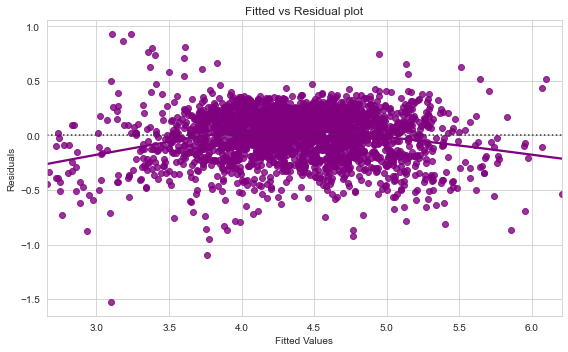

In [703]:
# let's plot the fitted values vs residuals
plt.figure(figsize=(8,5))
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see little pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

#### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

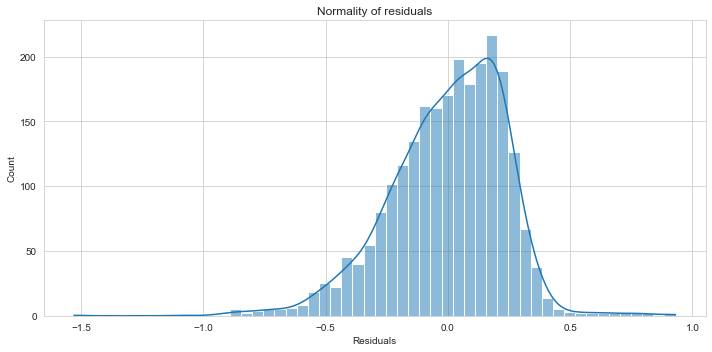

In [704]:
plt.figure(figsize=(10, 5))
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape thought not a perfect one.
- Let's check the Q-Q plot.

**The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

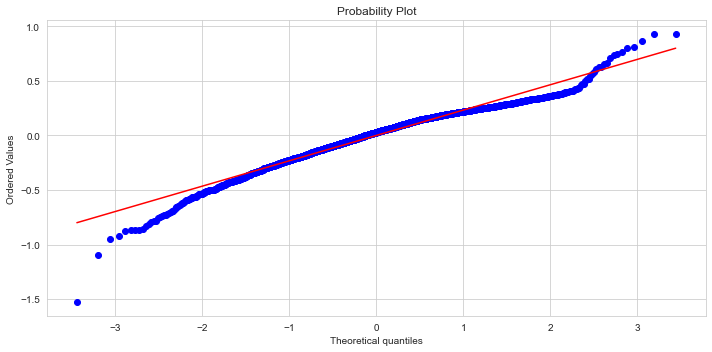

In [705]:
plt.figure(figsize=(10, 5))
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.
- We could have treated some outliers

### Shapiro test

- H0: 'Residuals are normal'
- H1: 'Residuals are not normal'

In [706]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9683807492256165, pvalue=1.1999667414081864e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

#### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

### Goldfeldquandt test

- Null hypothesis: Residuals are homoscedastic
- Alternate hypothesis: Residuals have heteroscedasticity

In [707]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0241017663880603), ('p-value', 0.3400467863715317)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**
H0: Data is homoscedastic

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [708]:
# predictions on the test set
pred = olsmod2.predict(x_test3)
df_pred_test = pd.DataFrame({"Actual": y_test['normalized_used_price'], "Predicted": pred})
df_pred_test.sample(10, random_state=1)


,Actual,Predicted
1995,4.566741,4.386911
2341,3.696103,4.003798
1913,3.592093,3.645507
688,4.306495,4.096048
650,4.522115,5.180404
2291,4.259294,4.392896
40,4.997685,5.452846
1884,3.875359,4.054425
2538,4.206631,4.064591
45,5.380450,5.289960


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

#### Let's print the linear regression equation.

In [709]:
# let's check the model parameters
olsmod2.params

const                   0.922999
main_camera_mp          0.021247
selfie_camera_mp        0.014592
ram                     0.020355
weight                  0.001658
release_year            0.031598
normalized_new_price    0.427008
os_Others              -0.143144
4g_yes                  0.044047
dtype: float64

In [710]:
# Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(olsmod2.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            olsmod2.params[i],
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod2.params[i], "* (", x_train3.columns[i], ")")

normalized_used_price = 0.9229990782560823 + 0.02124677017642798 * ( main_camera_mp ) +  0.014592294537700286 * ( selfie_camera_mp ) +  0.02035529297176253 * ( ram ) +  0.0016576360172380262 * ( weight ) +  0.03159777566802317 * ( release_year ) +  0.42700794309911494 * ( normalized_new_price ) +  -0.14314436060168215 * ( os_Others ) +  0.04404665205224867 * ( 4g_yes )


## Final Model

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsmod2).

Let's recreate the final model and print it's summary to gain insights.

In [711]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [712]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.836
Method:                    Least Squares   F-statistic:                     1544.
Date:                   Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:22:08   Log-Likelihood:                 62.856
No. Observations:                   2417   AIC:                            -107.7
Df Residuals:                       2408   BIC:                            -55.60
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [713]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    "OLS", x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235759,0.184683,0.836856,0.836246,4.440051


In [714]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    "OLS", x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239827,0.185081,0.840531,0.839133,4.502213


* The model is able to explain ~83.6% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the used price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Conclusions and Recommendations

### Observations

* R-squared of the model is 0.84 and adjusted R-squared is 0.83, which shows that the model is able to explain ~83.9% variance in the data. 

* A unit increase in the main_camera_mp will result in a 0.021247 increase in the normalized_used_price of a used phone/tablet , all other variables remaining constant.

* A unit increase in the ram will result in a 0.020355 increase in the normalized_used_price of a used phone/tablet , all other variables remaining constant.


## Revisit sklearn with the modified x

In [715]:
def adj_r2_score(x, y, y_pred):
    r2 = r2_score(y, y_pred)
    n = x.shape[0]
    k = x.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [716]:
clf = LinearRegression()

clf.fit(x_train_final, y_train)
y_pred_train = clf.predict(x_train_final) 
y_pred_test = clf.predict(x_test_final)

print('R2 values:')
print(clf.score(x_train_final, y_train)) #.score means R2 square
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.8368558324098045
0.8393573672646584

Adjusted R2 values:
0.836245820981341
0.8379495934626934


In [717]:
clf = Lasso()

clf.fit(x_train_final, y_train)

print('R2 values:')
print(clf.score(x_train_final, y_train)) 
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.5206066306467377
0.49498722302753684

Adjusted R2 values:
0.836245820981341
0.8379495934626934


In [718]:
clf = Ridge()

clf.fit(x_train_final, y_train)

print('R2 values:')
print(clf.score(x_train_final, y_train)) 
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.8368551580016257
0.839337432037777

Adjusted R2 values:
0.836245820981341
0.8379495934626934


In [719]:
clf = ElasticNet()

clf.fit(x_train_final, y_train)

print('R2 values:')
print(clf.score(x_train_final, y_train)) 
print(clf.score(x_test_final, y_test))

print('\nAdjusted R2 values:')
print(adj_r2_score(x_train_final, y_train, y_pred_train))
print(adj_r2_score(x_test_final, y_test, y_pred_test))

R2 values:
0.6298134571884694
0.613038541706511

Adjusted R2 values:
0.836245820981341
0.8379495934626934


#### The accuracy is similar to OLS. So we will use the OLS method instead of the sklearn model OR,
#### We have to use other regressors (non-linear) - KNN, RF, DT, SVM

___